# Introduction

#### This workbook consists of the exploratory data analysis and modelling for our election results data that we compiled and processed.
#### Our goal here is to figure out which factors from our analysis impact election results and also to build models that can be effective in predicting election results.

# Exploratory Data Analysis

## Import and Formatting

#### Now that we have cleaned our dataset, we can now import our clean dataset along with our libraries to conduct our exploratory data analysis and modelling.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
#set the plotting style
sns.set_style("whitegrid")

# Model preprocessing
from sklearn.preprocessing import StandardScaler

#Modelling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

# Plotting tools
import plotly.offline as po
import plotly.graph_objs as pg

#Scikit for random forest model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree

In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/jamilditter/election_results/refs/heads/main/data/Voting_Breakdown_By_Socioeconomic_and_Demographic_Factors.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                357 non-null    object 
 1   year                 357 non-null    int64  
 2   total_votes          357 non-null    int64  
 3   dem_votes            357 non-null    float64
 4   rep_votes            357 non-null    float64
 5   unemployment_rate    357 non-null    float64
 6   median_income        357 non-null    int64  
 7   med_age              306 non-null    float64
 8   bach_per             357 non-null    float64
 9   voter_participation  357 non-null    float64
 10  voting_age_pop       357 non-null    float64
 11  Population 18-24     357 non-null    int64  
 12  Population 25-44     357 non-null    int64  
 13  Population 45-64     357 non-null    int64  
 14  Population 65+       357 non-null    int64  
 15  dem_votes_per        357 non-null    flo

In [52]:
df["pop_18_24_per"] = df["Population 18-24"] / df["voting_age_pop"]
df["pop_25_44_per"] = df["Population 25-44"] / df["voting_age_pop"]
df["pop_45_64_per"] = df["Population 45-64"] / df["voting_age_pop"]
df["pop_65_per"] = df["Population 65+"] / df["voting_age_pop"]

In [53]:
df["unemployment_rate"] = df["unemployment_rate"]/100
df["voter_participation"] = df["voter_participation"]/100

In [54]:
df

state  year  total_votes  dem_votes  rep_votes  \
0          ALABAMA  2000      1672551   695602.0   944409.0   
1           ALASKA  2000       285530    79004.0   167398.0   
2          ARIZONA  2000      1534113   685341.0   781652.0   
3         ARKANSAS  2000       921781   422768.0   472940.0   
4       CALIFORNIA  2000     10965856  5861203.0  4567429.0   
..             ...   ...          ...        ...        ...   
352       VIRGINIA  2024      4482576  2335395.0  2075085.0   
353     WASHINGTON  2024      3924243  2245849.0  1530923.0   
354  WEST VIRGINIA  2024      1524780   214309.0   533556.0   
355      WISCONSIN  2024      6845836  1668229.0  1697626.0   
356        WYOMING  2024       271123    69527.0   192633.0   

     unemployment_rate  median_income  med_age  bach_per  voter_participation  \
0                0.047          60570     43.0  0.239566                0.604   
1                0.063          52850     41.0  0.284222                0.677   
2                0.040          68020     44.0  0.268370                0.525   
3                0.042          50780     44.0  0.192445                0.505   
4                0.049          80050     42.0  0.328816                0.579   
..                 ...            ...      ...       ...                  ...   
352              0.029          97720      NaN  0.433000                0.729   
353              0.045          97500      NaN  0.410000                0.700   
354              0.041          63150      NaN  0.244000                0.595   
355              0.030          82560      NaN  0.346000                0.722   
356              0.032          78680      NaN  0.323000                0.638   

     ...  Population 25-44  Population 45-64  Population 65+  dem_votes_per  \
0    ...           1284371           1022405          580880       0.415893   
1    ...            202899            140673           36106       0.276692   
2    ...           1514406           1081807          671332       0.446734   
3    ...            749201            610756          374504       0.458643   
4    ...          10724282           6996801         3608449       0.534496   
..   ...               ...               ...             ...            ...   
352  ...           2391548           2174373         1547113       0.520994   
353  ...           2386166           1862213         1379589       0.572301   
354  ...            425293            452573          387446       0.140551   
355  ...           1509688           1477002         1168733       0.243685   
356  ...            151746            137503          115668       0.256441   

     rep_votes_per  dem_win  pop_18_24_per  pop_25_44_per  pop_45_64_per  \
0         0.564652    False       0.132810       0.385709       0.307038   
1         0.586271    False       0.131863       0.463930       0.321650   
2         0.509514    False       0.137207       0.399878       0.285650   
3         0.513072    False       0.131993       0.374936       0.305652   
4         0.416514     True       0.137186       0.433815       0.283032   
..             ...      ...            ...            ...            ...   
352       0.462922     True       0.117604       0.345212       0.313864   
353       0.390119     True       0.107117       0.378568       0.295442   
354       0.349923    False       0.109947       0.299162       0.318351   
355       0.247979    False       0.119609       0.319851       0.312926   
356       0.710500    False       0.119029       0.330151       0.299163   

     pop_65_per  
0      0.174444  
1      0.082557  
2      0.177265  
3      0.187420  
4      0.145968  
..          ...  
352    0.223321  
353    0.218873  
354    0.272539  
355    0.247614  
356    0.251657  

[357 rows x 22 columns]

#### It is worth noting that we created variables for our population data to be in percentages rather than total population numbers in each demographic.
#### One caveat here is that we were are missing some median age data, but we can still proceed forward with our EDA regardless.

## Heatmaps

#### We will start with looking at heatmap analyses for comparing our predictor variables of unemployment rate, median income, median age, percentage of bachelor degree attainment, voter participation, along with voting age population and four age groups.

#### These heatmaps will give us a good overview of our data, while also giving us an understanding around variable relationships that are worth exploring.

#### We will first look at Democrat voting percentages.

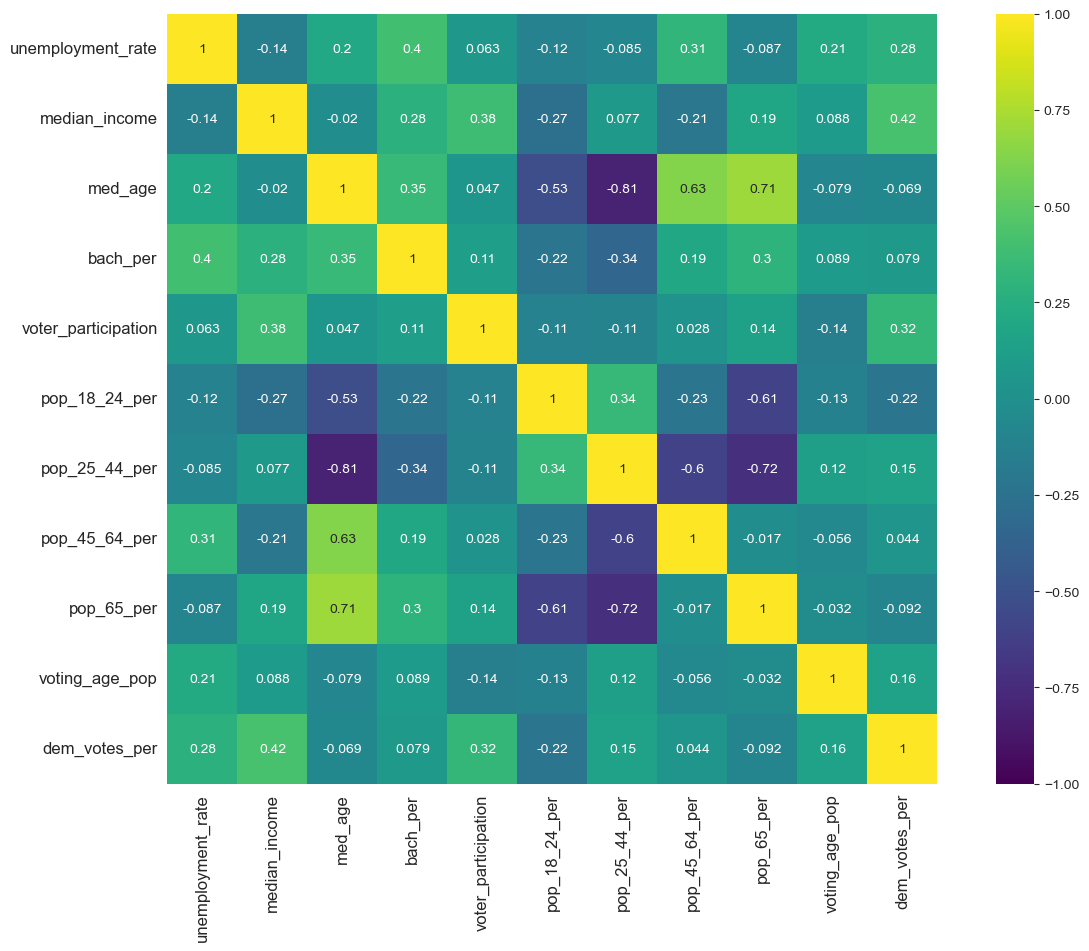

In [55]:
predictor_variables = ['unemployment_rate', 'median_income', 'med_age', 'bach_per', 'voter_participation', 'pop_18_24_per', 'pop_25_44_per', 'pop_45_64_per', 'pop_65_per', 'voting_age_pop']

numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix_dem = df[numerical_predictors+ ["dem_votes_per"]].corr()

plt.figure(figsize=(15,10))

sns.heatmap(corr_matrix_dem, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis")

plt.tick_params(labelsize=12)

plt.show()

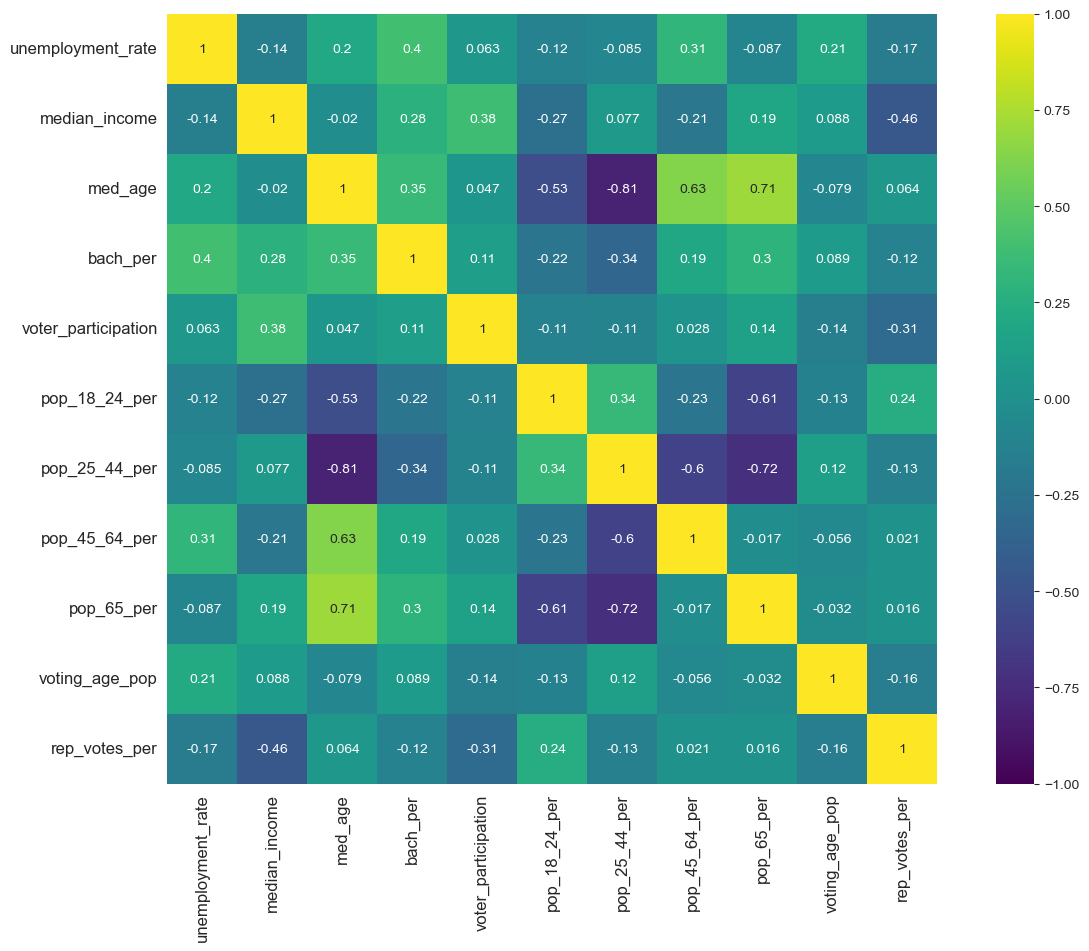

In [56]:
corr_matrix_rep = df[numerical_predictors+ ["rep_votes_per"]].corr()

plt.figure(figsize=(15,10))

sns.heatmap(corr_matrix_rep, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis")

plt.tick_params(labelsize=12)

plt.show()

#### Starting with the democratic votes per state model, we noticed some moderately positive relationships with median income (0.42), and voter participation (0.32), with a weak to moderate relationship with unemployment rate (0.28).
#### We also noticed a -0.22 correlation with the 18-24 year old voting percentage for the percentage of democratic votes.

#### The Republican votes per state model noted similar inverse relationships compared to democratic votes per state as expected, but also showed a weaker negative correlation with unemployment rate at -0.17. Republican votes had a stronger negative correlation at -0.46 for median income. 

#### It is worth noting that we had multiple variables that were based on age, which explains the higher correlation values within our population proportions and median age.

#### We believe it is worth exploring these relationship further to see how both republican and democratic votes are impacted by our models and if these are statistically significant relationships. 

## Pairplots

#### We wanted to look at pair plots as the next step in our exploratory data analysis to get a more concise view of the distribution of the data to see if we can take away additional information here.
#### We will start with Democrat voting percentages.

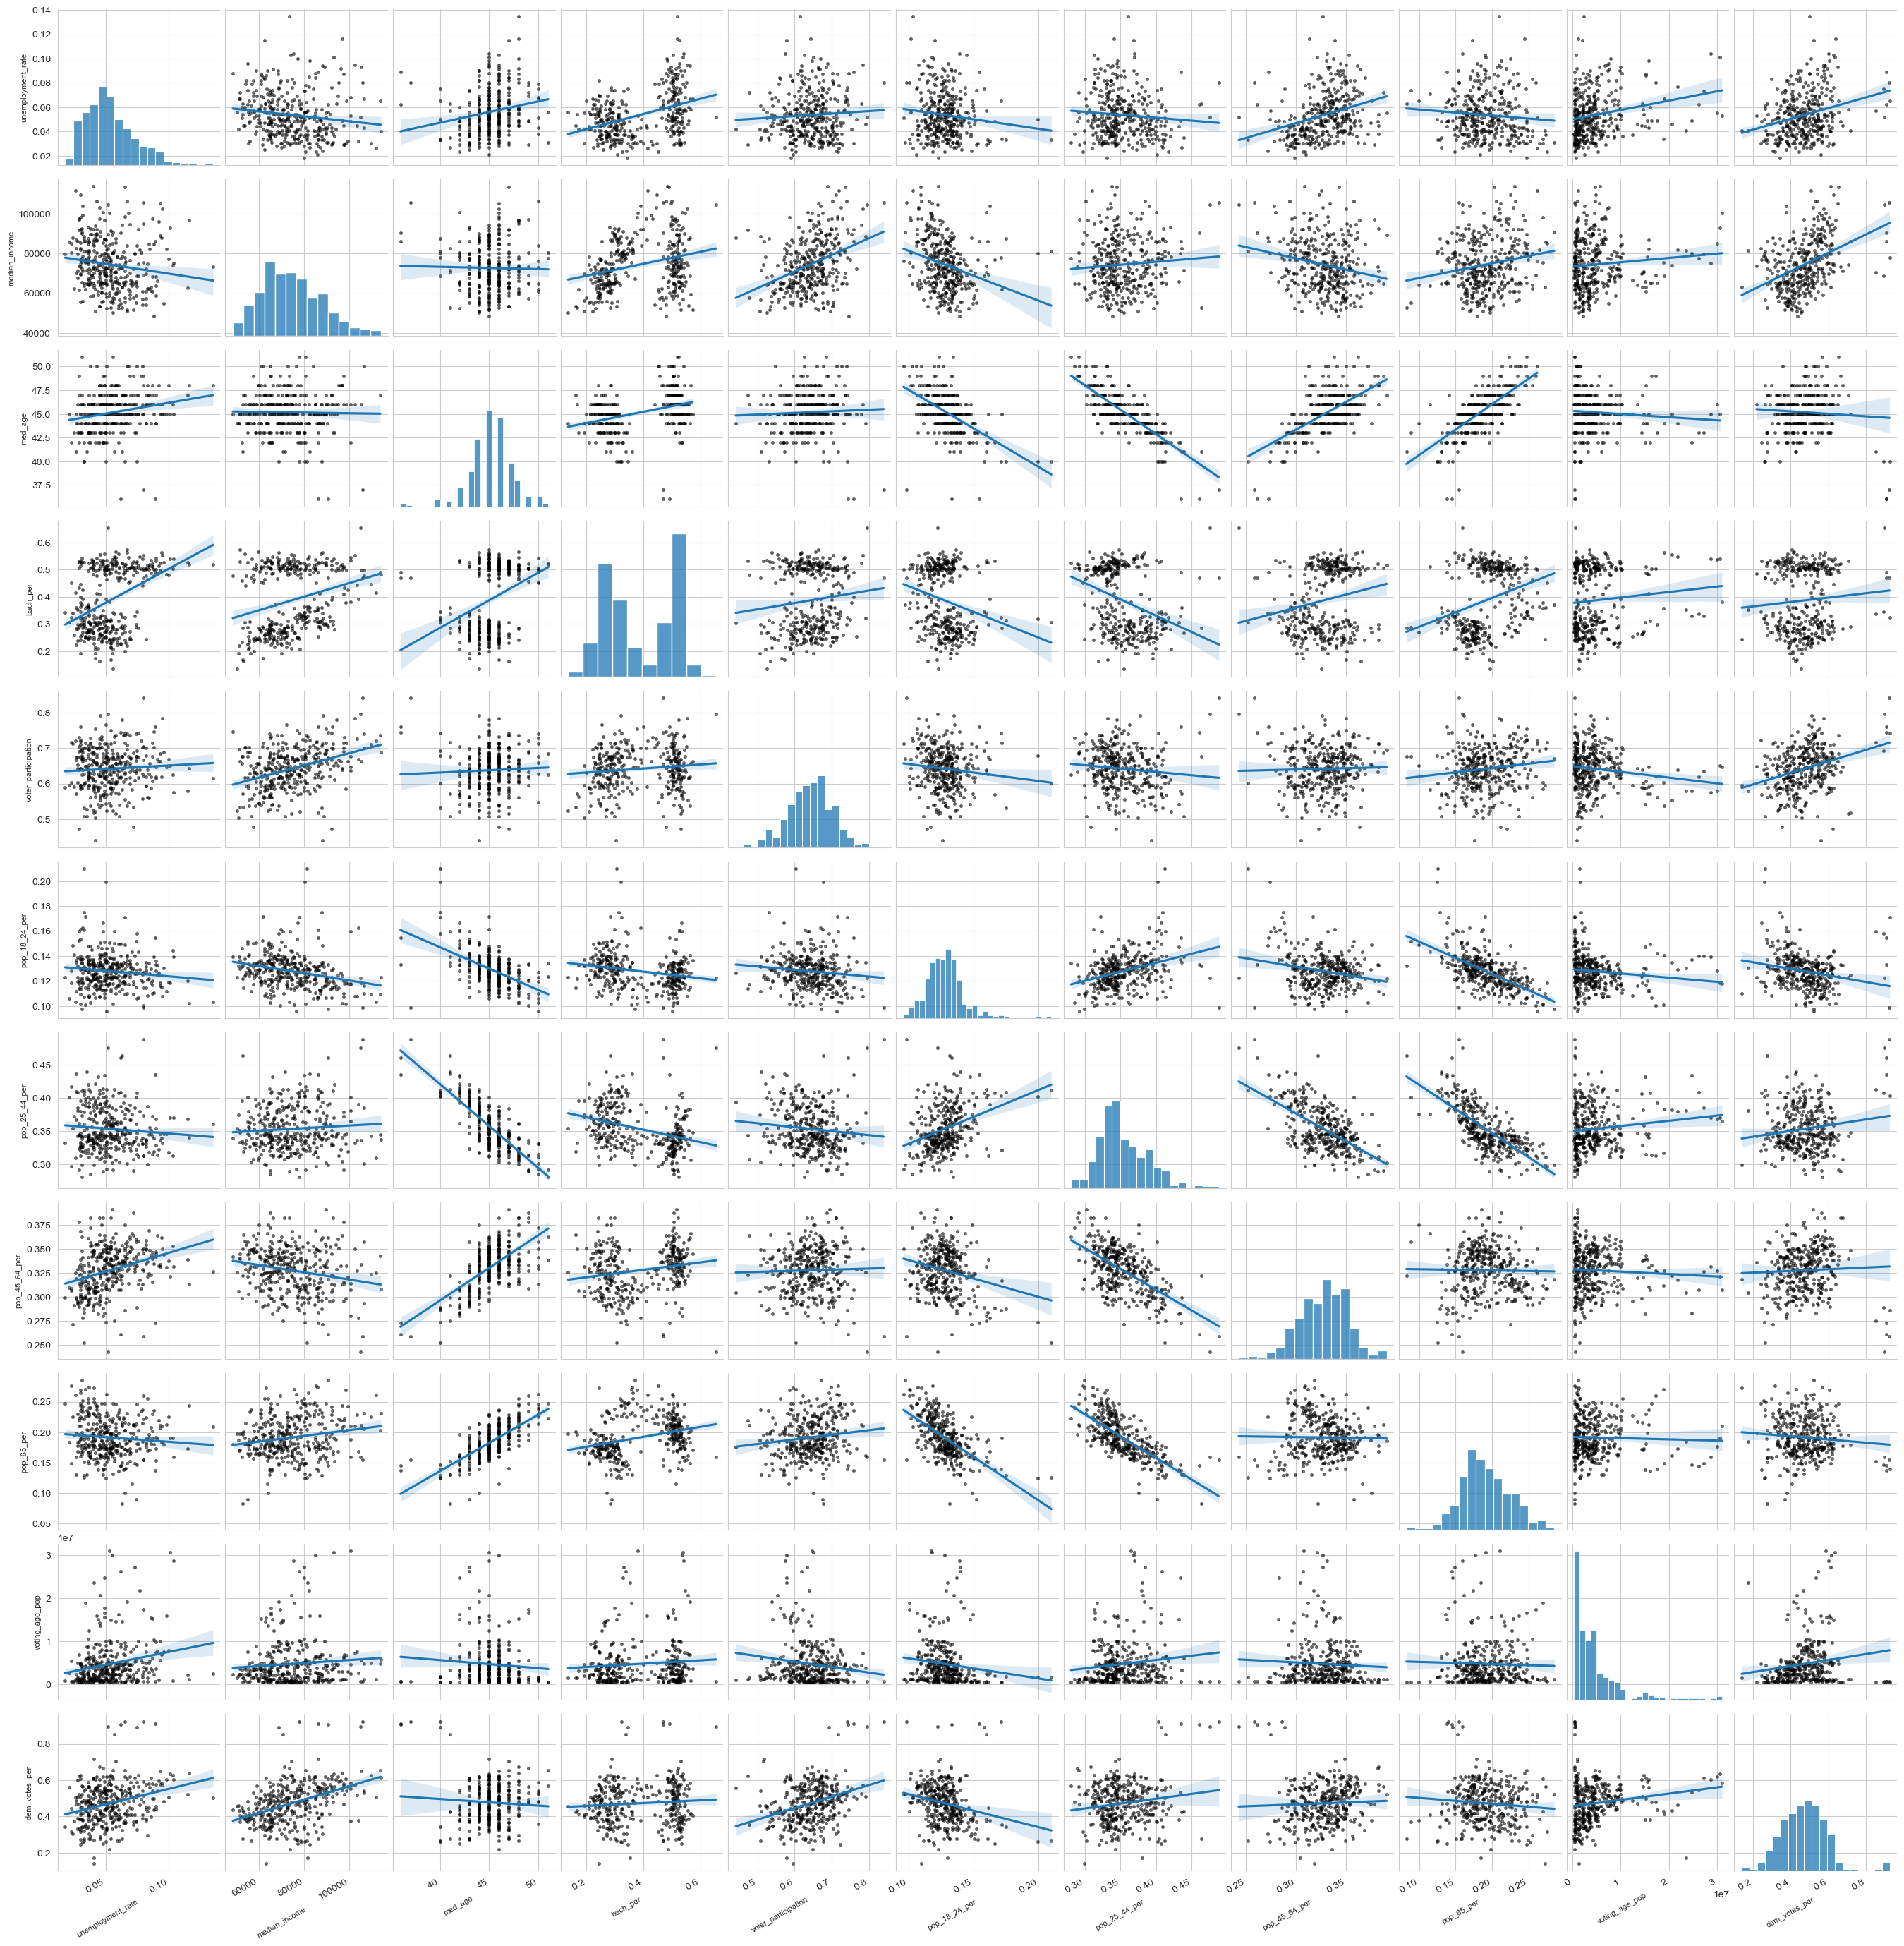

In [57]:
fig = sns.pairplot(
    data=df,
    vars=numerical_predictors + ['dem_votes_per'],
    kind="reg",
    plot_kws={"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

#### And then Republican voting percentages.

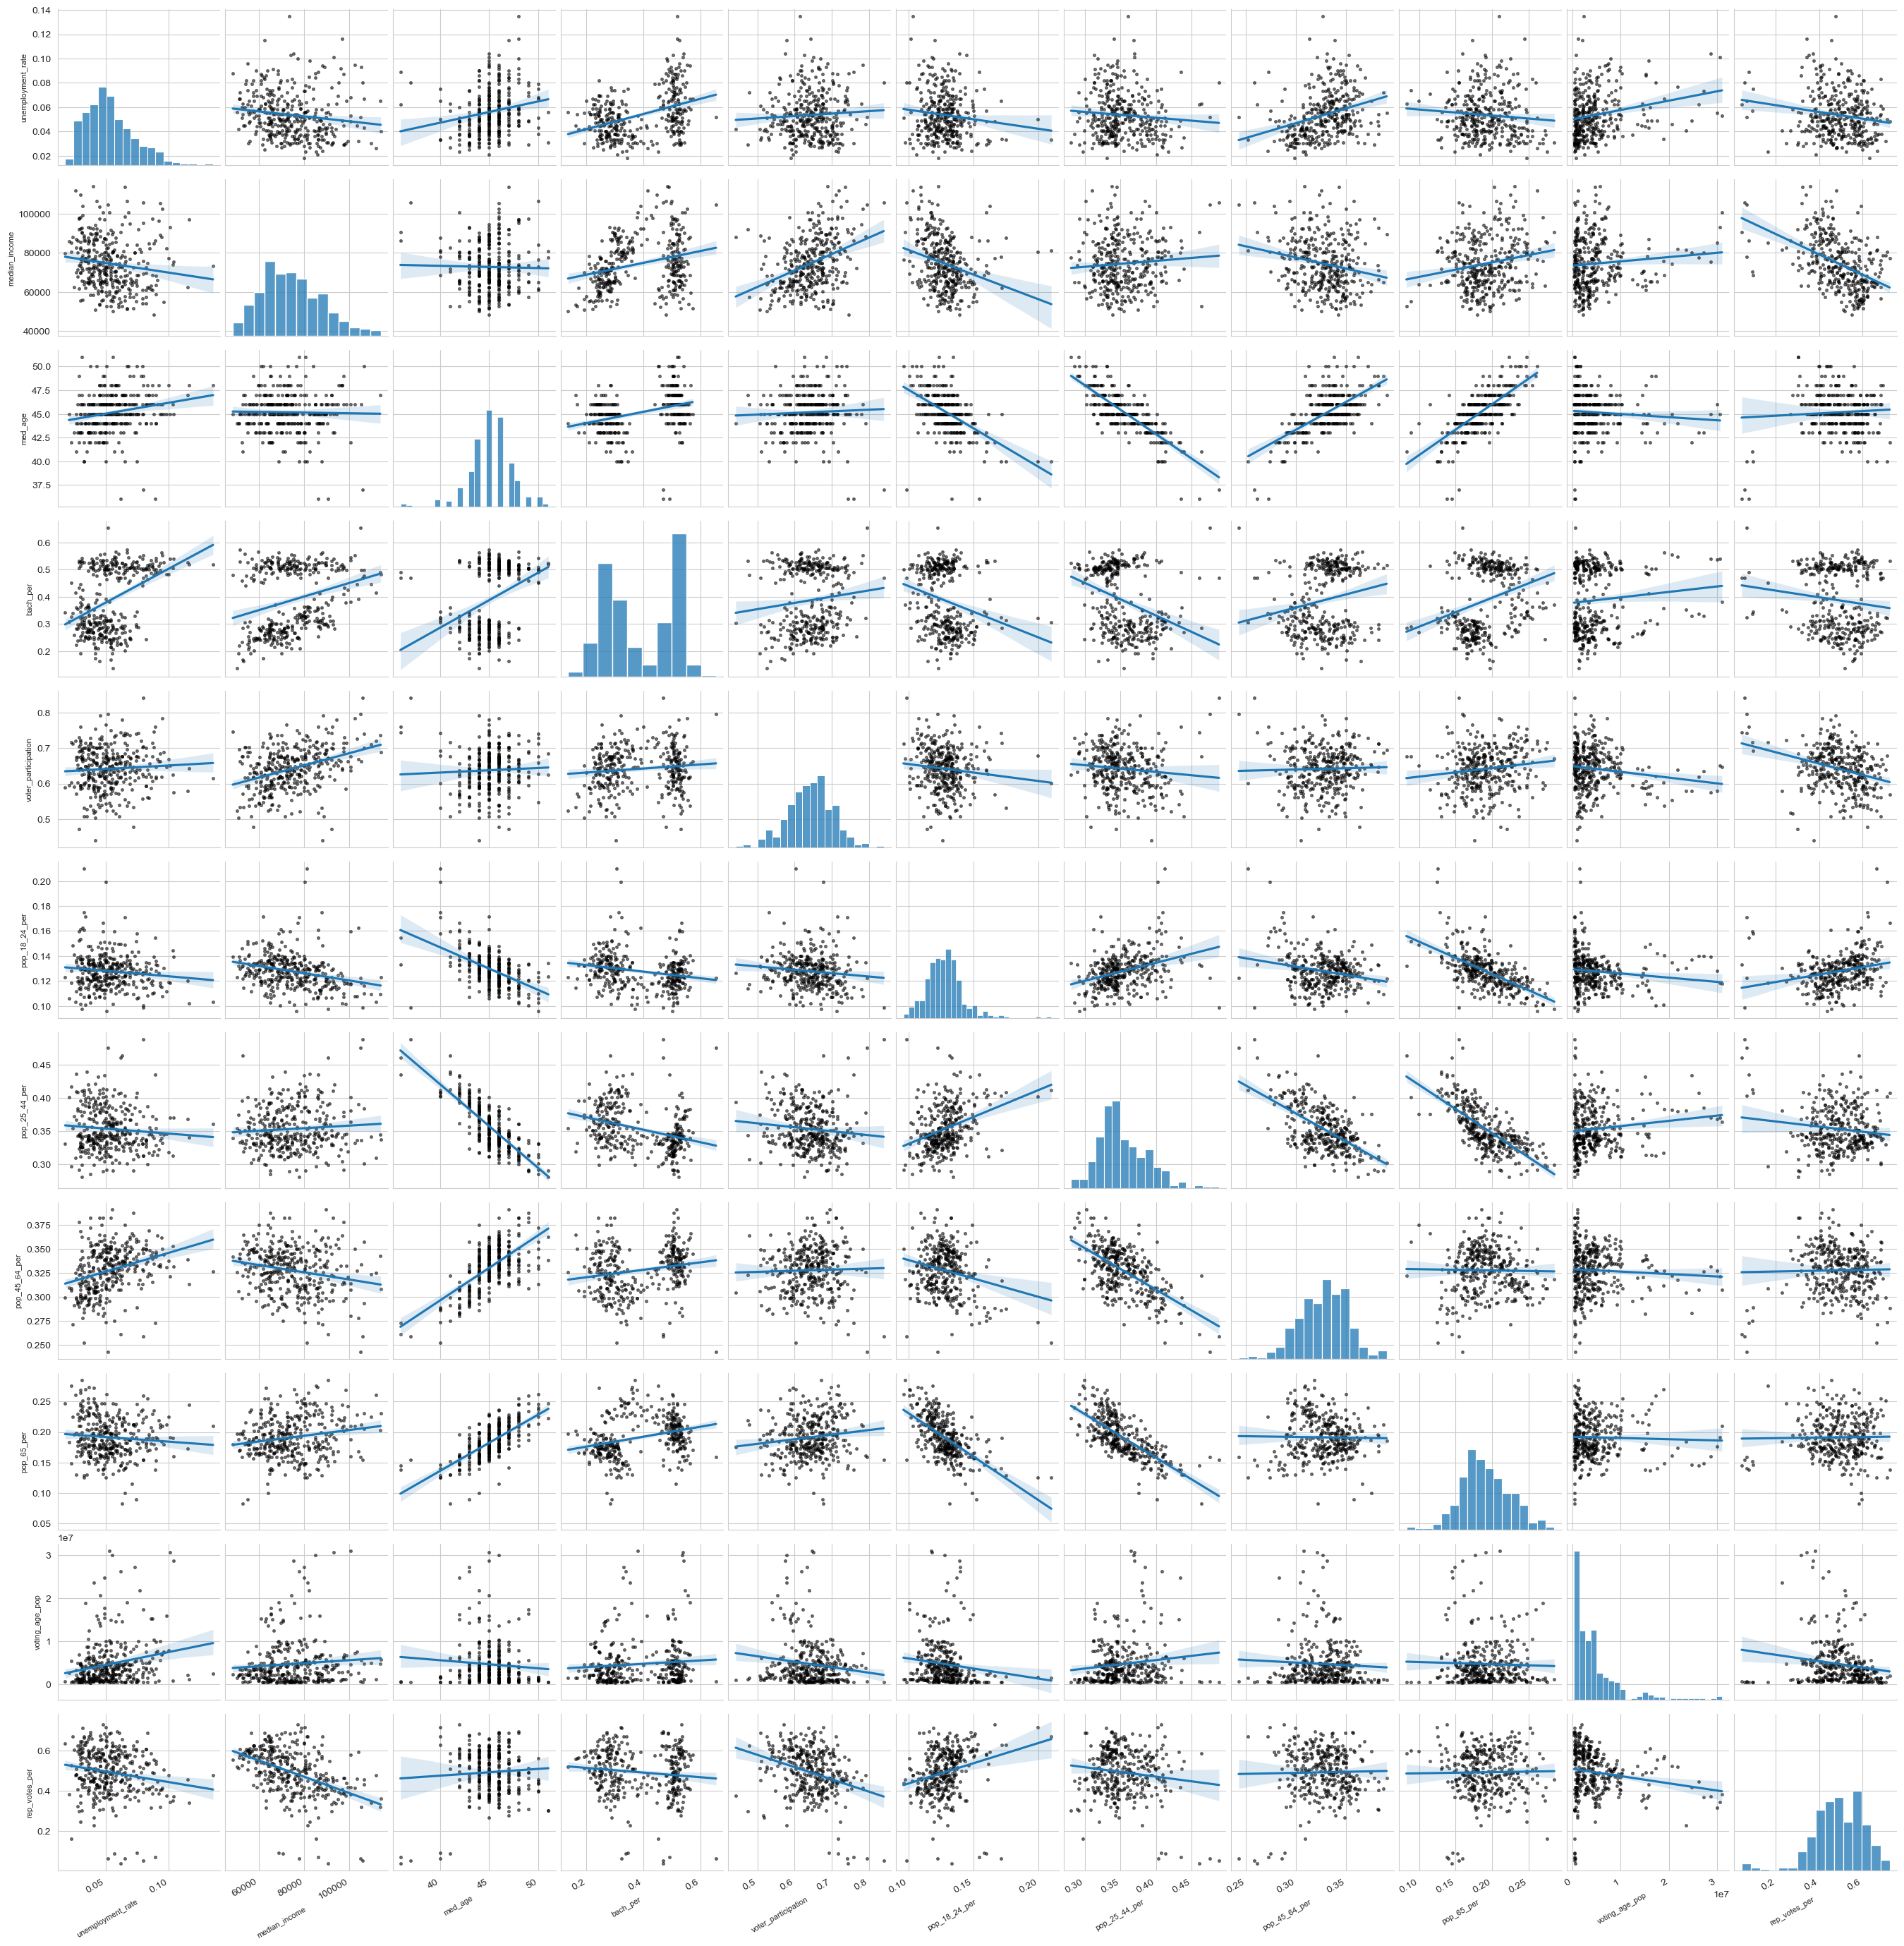

In [58]:
fig = sns.pairplot(
    data=df,
    vars=numerical_predictors + ['rep_votes_per'],
    kind="reg",
    plot_kws={"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

#### These pairplots on the surface also show us that unemployment rate, median income, voter participation, and the percentage of 18-24 voters seem to have a relationship with democrat and republican voting percentages.
#### Once again, we notice similar trends based on the regression lines through our scatter plots. However, we can also see how the data is distributed here, as well as seeing some potential outliers in our data as well.
#### To further our outlier analysis here, we can utilize boxplots to get a stronger sense of how our outliers are distributed.

## Boxplots

#### Utilizing boxplots will help us understand the outliers that could be influencing our data, and also the direction of where those outliers fall.
#### We will start with a plot of our proportion variables which consist of age, unemployment, bachelor and voter participation variables.

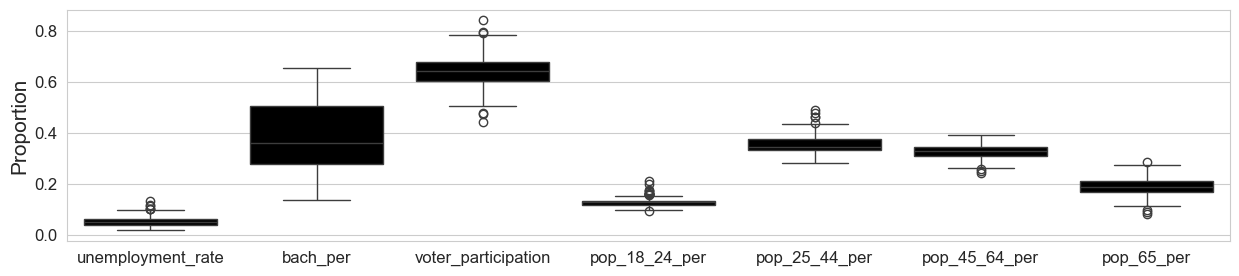

In [59]:
plt.figure(figsize=(15,3))

fractions = list(numerical_predictors)
fractions.remove('voting_age_pop')
fractions.remove('median_income')
fractions.remove('med_age')

sns.boxplot(data=df[fractions], color='k')

plt.ylabel('Proportion', fontsize=15)

plt.tick_params(labelsize=12)

plt.show()

#### Most of the outliers fall above the box plots (indicating higher proportions in each case). 
#### We can also see some lower outlier proportions for voter participation, percentage of 45-6 and 65+ voters, and what looks to be one lower outlier in 18-24 voter percentage.
#### Our non-porportion variables are plotted below here, consisting of median income, voting age population, and median age.

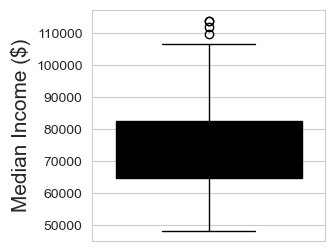

In [60]:
plt.figure(figsize=(3,3))

sns.boxplot(data=df, y = 'median_income', color='k')

plt.ylabel('Median Income ($)', fontsize=15)

plt.show()

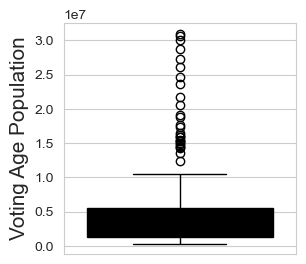

In [61]:
plt.figure(figsize=(3,3))

sns.boxplot(data=df, y = 'voting_age_pop', color='k')

plt.ylabel('Voting Age Population', fontsize=15)

plt.show()

#### The box plot above is plotted in millions for reference.

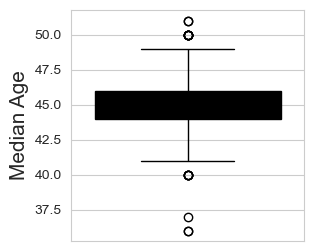

In [62]:
plt.figure(figsize=(3,3))

sns.boxplot(data=df, y = 'med_age', color='k')

plt.ylabel('Median Age', fontsize=15)

plt.show()

#### Voting age population showed a high number of outliers, which could be contributed to population growth over time.
#### Median age has some 50+ outliers, and some lower outliers at or below 40 years old, with most of the data falling somewhere within 43 and 47 years.
#### Median income had a few higher outliers above $105,000, but most of the data fell within the box plot.

#### Overall, our exploratory data analysis showed some relationships that we would like to explore further in some statistical models that can show us more about the statistical significance of our relationships. 

# Modelling

# Random Forest Model

#### We wanted to start our analysis with a random forest model to figure out optimal predictions for voting results.
#### We will first demonstrate this with our national model.

## National Model

#### Our variable of dem_win represents if a democratic presidential candidate won in a given state. We will use this as the variable that we are looking to predict here.

In [63]:
X = df[numerical_predictors]
y = df["dem_win"]

X = pd.get_dummies(X, drop_first=True) #One-hot encoding method to set up our forest model.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

forest_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=9,
    random_state=0
)

forest_model.fit(X_train, y_train)

y_pred = forest_model.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred)

0.8333333333333334

#### Our accuracy score showed that our model was approximately 83% accurate in predicting Democrat or Republican results in a presidential election, which is pretty good in this analysis.
#### The classification report gives us a more detailed breakdown of our data.

In [65]:
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

print(class_report_df)

              precision    recall  f1-score    support
False          0.800000  0.888889  0.842105  36.000000
True           0.875000  0.777778  0.823529  36.000000
accuracy       0.833333  0.833333  0.833333   0.833333
macro avg      0.837500  0.833333  0.832817  72.000000
weighted avg   0.837500  0.833333  0.832817  72.000000


#### The weighted average here shows the overall accuracy for each of our groups in proportion to our dataset, whereas accuracy measures the overall accuracy of our data.
#### These metrics are extremely similar as both show a score between 83 and 84%.
#### We will proceed with creating a plot of our forest model, which will show a breakdown of each of the decision trees in our model.

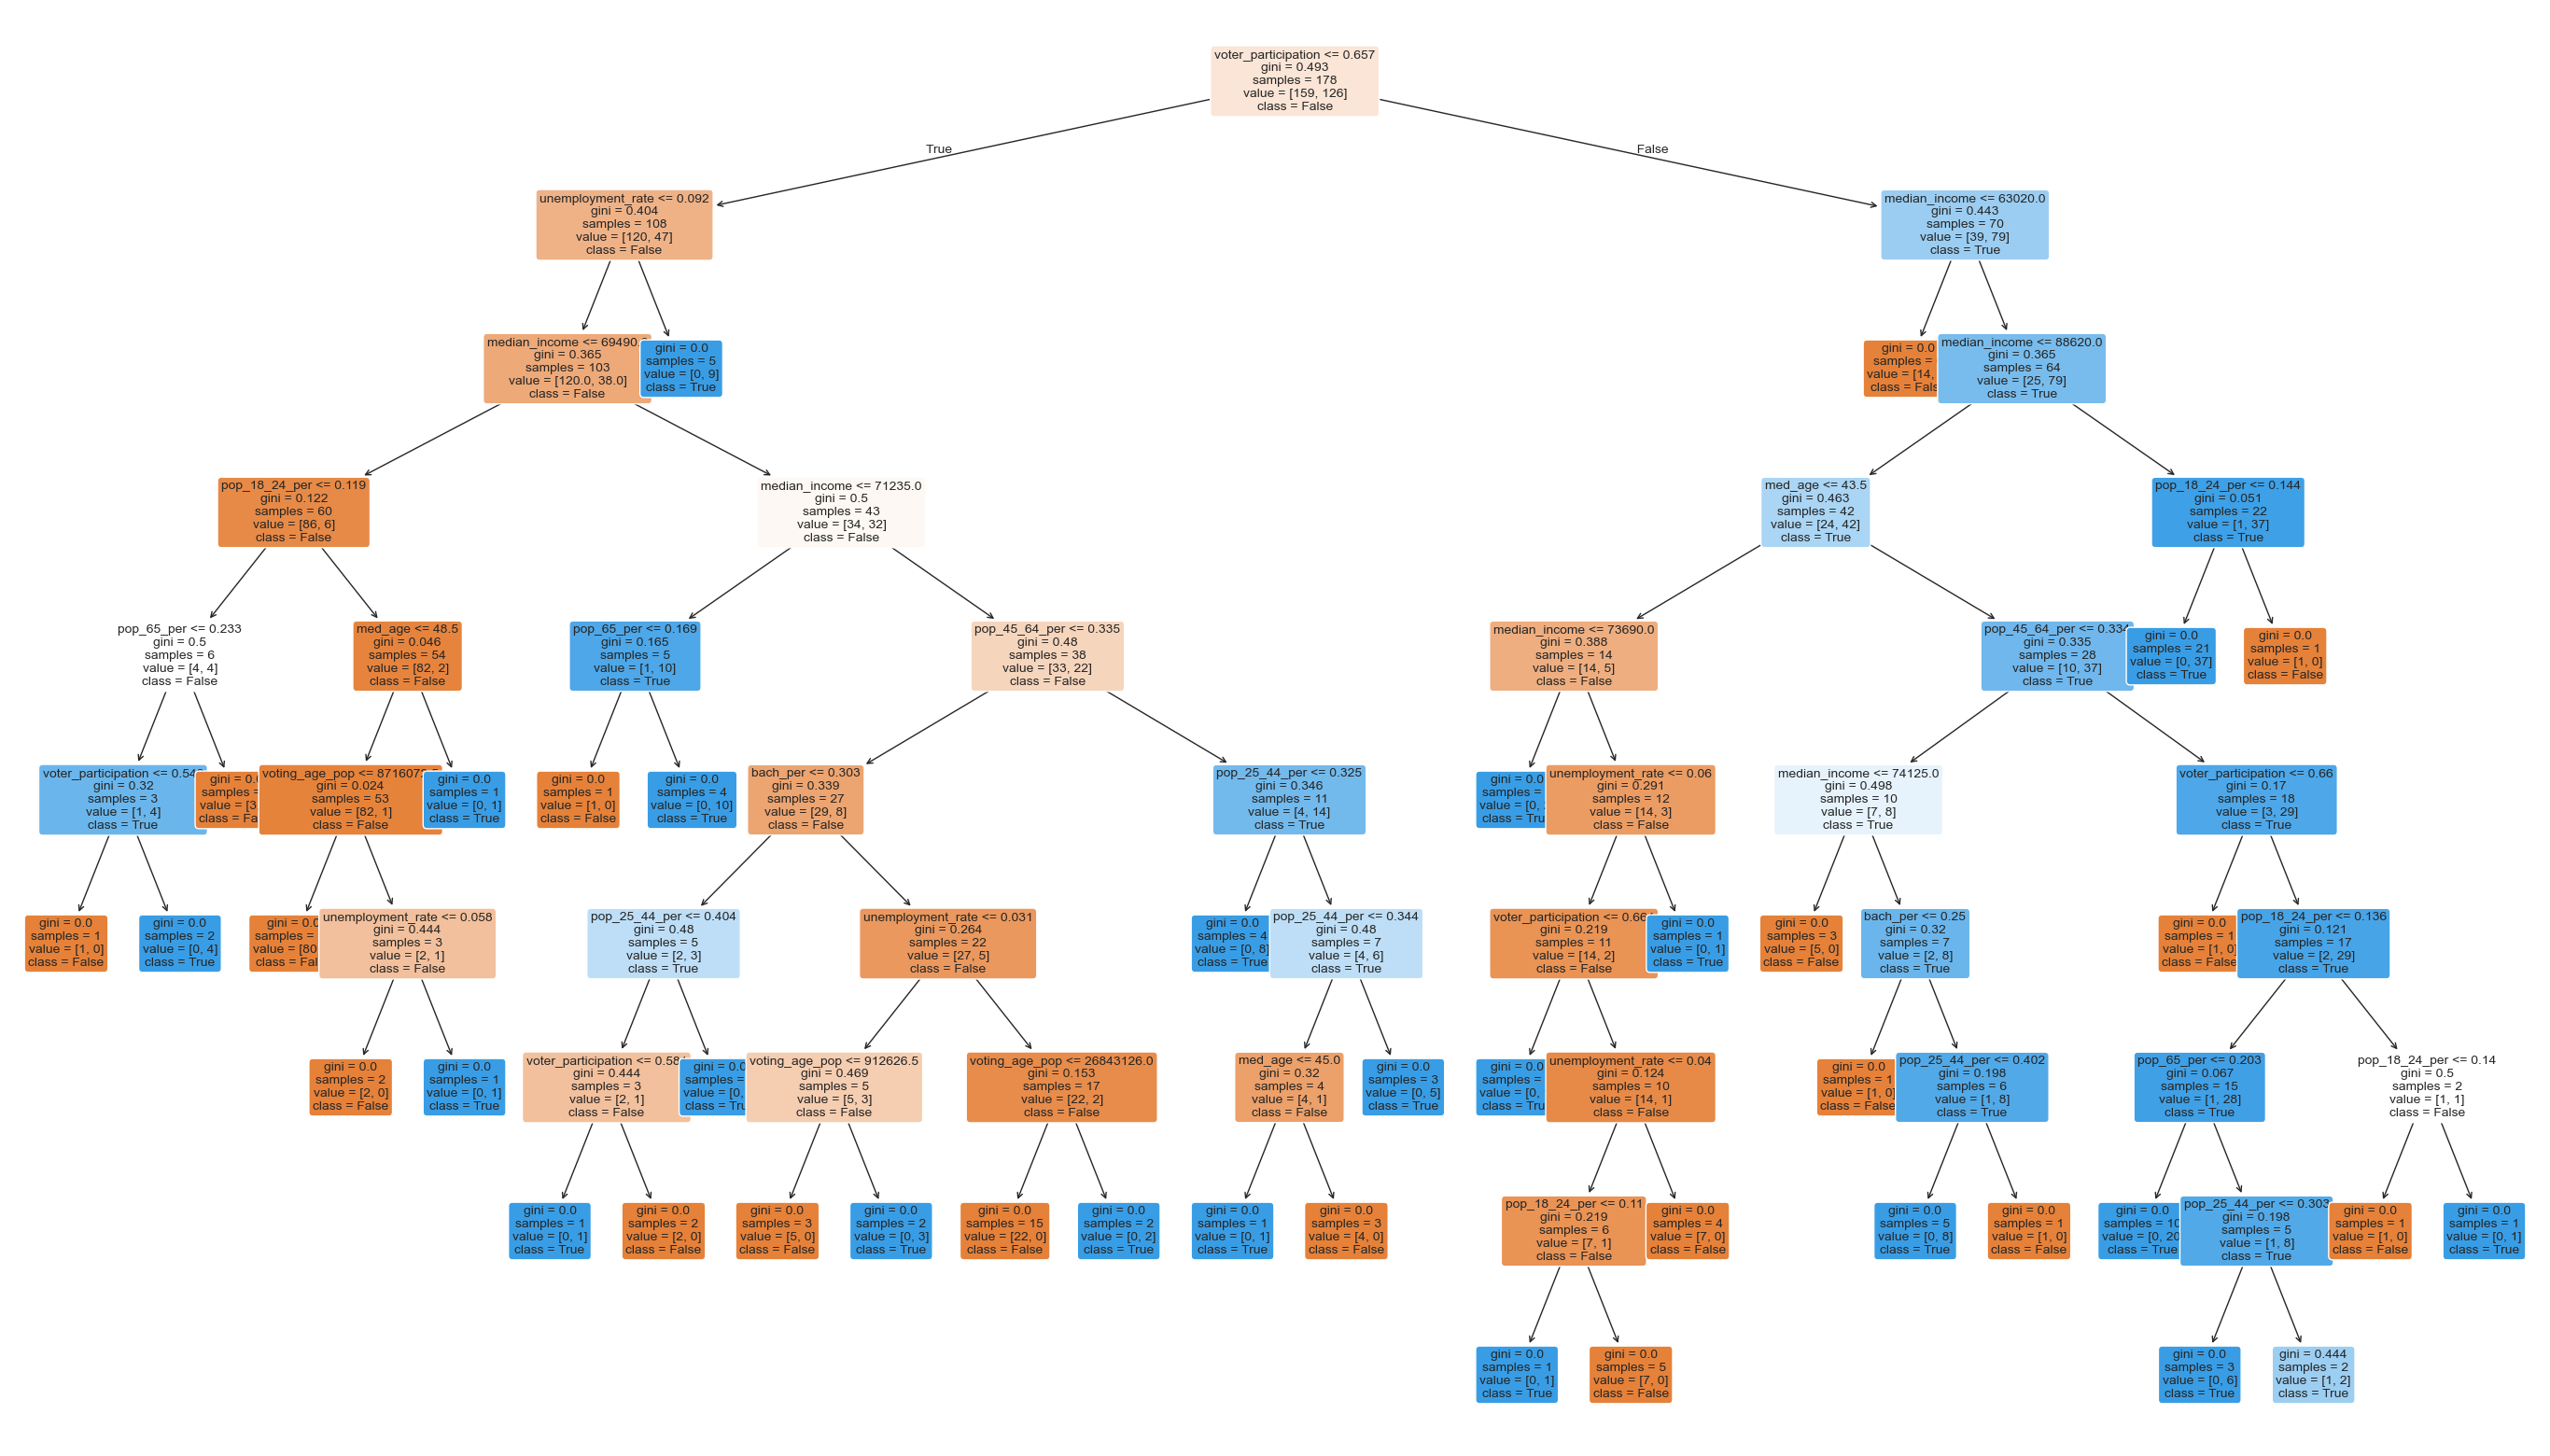

In [66]:
tree = forest_model.estimators_[0]

plt.figure(figsize=(35, 20))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=[str(c) for c in forest_model.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

## Swing State Models

#### We also wanted to demonstrate using a swing state random forest model to see if it gives us insight into predictive factors at the individual state level.

In [67]:
df_penn = df[df["state"] == "PENNSYLVANIA"]

X = df_penn[numerical_predictors]
y = df_penn["dem_win"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

forest_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    random_state=0
)

forest_model.fit(X_train, y_train)

y_pred = forest_model.predict(X_test)

In [68]:
accuracy_score(y_test, y_pred)

0.5

#### This accuracy score represents that the random forest model will be similarly accurate to random change or flipping a coin. This means that our state model is not as effective as our national model.

In [69]:
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

print(class_report_df)

              precision  recall  f1-score  support
False              0.00     0.0  0.000000      1.0
True               0.50     1.0  0.666667      1.0
accuracy           0.50     0.5  0.500000      0.5
macro avg          0.25     0.5  0.333333      2.0
weighted avg       0.25     0.5  0.333333      2.0


e:\Anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

e:\Anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

e:\Anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



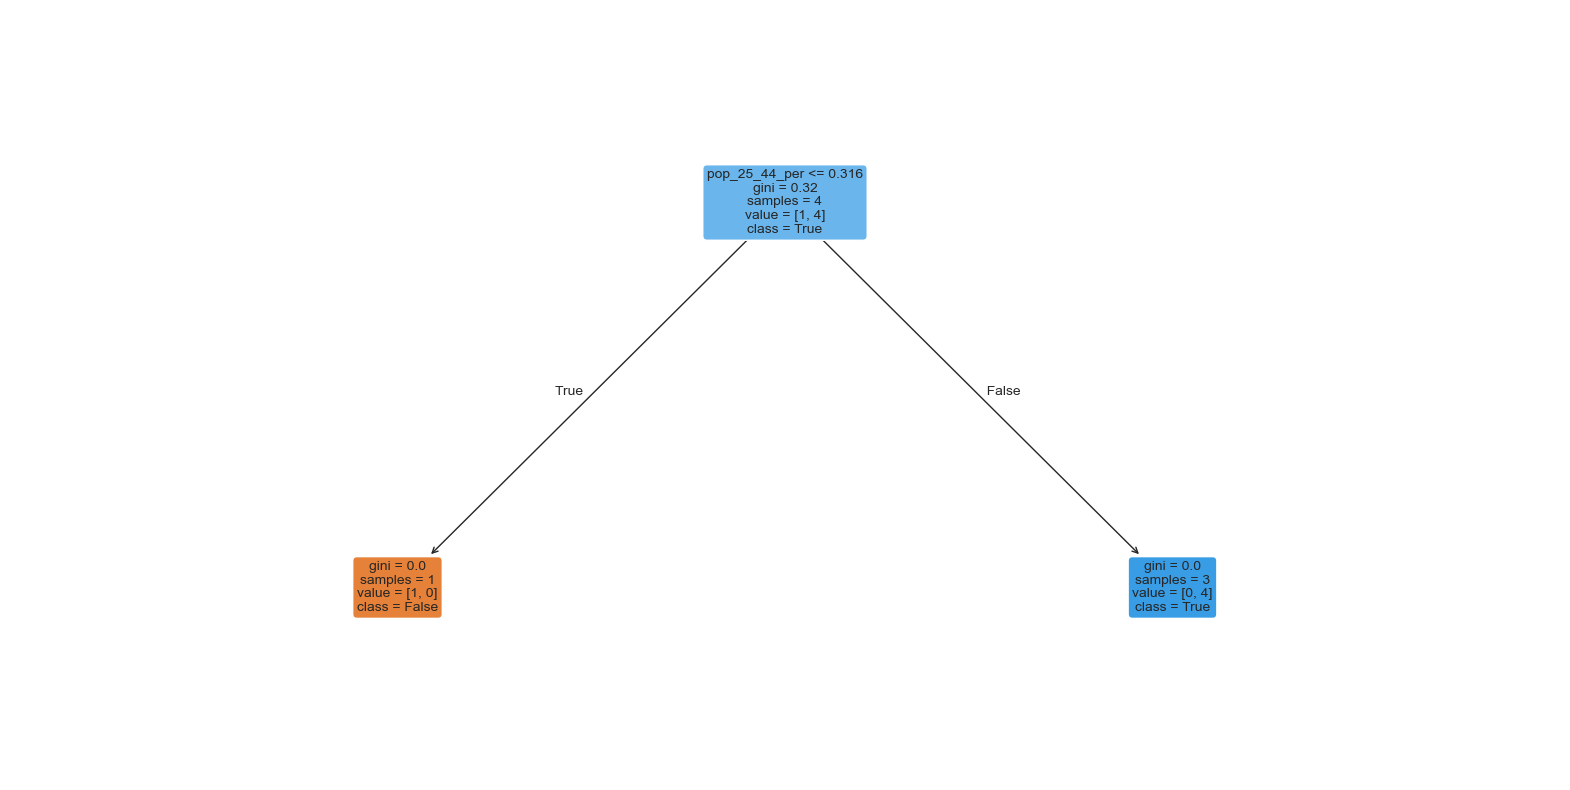

In [70]:
tree = forest_model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=[str(c) for c in forest_model.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

#### This tree plot and the classification report also show similar results here.

#### We also applied this model to five swing states.

In [71]:
swing_states = ["WISCONSIN", "PENNYSLVANIA", "OHIO", "MICHIGAN", "FLORIDA"]

df_swing = df[df["state"].isin(swing_states)]

X = df_swing[numerical_predictors]
y = df_swing["dem_win"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2
)

forest_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    random_state=2
)

forest_model.fit(X_train, y_train)

y_pred = forest_model.predict(X_test)

In [72]:
accuracy_score(y_test, y_pred)

0.5

In [73]:
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

print(class_report_df)

              precision  recall  f1-score  support
False               0.0   0.000  0.000000      2.0
True                0.6   0.750  0.666667      4.0
accuracy            0.5   0.500  0.500000      0.5
macro avg           0.3   0.375  0.333333      6.0
weighted avg        0.4   0.500  0.444444      6.0


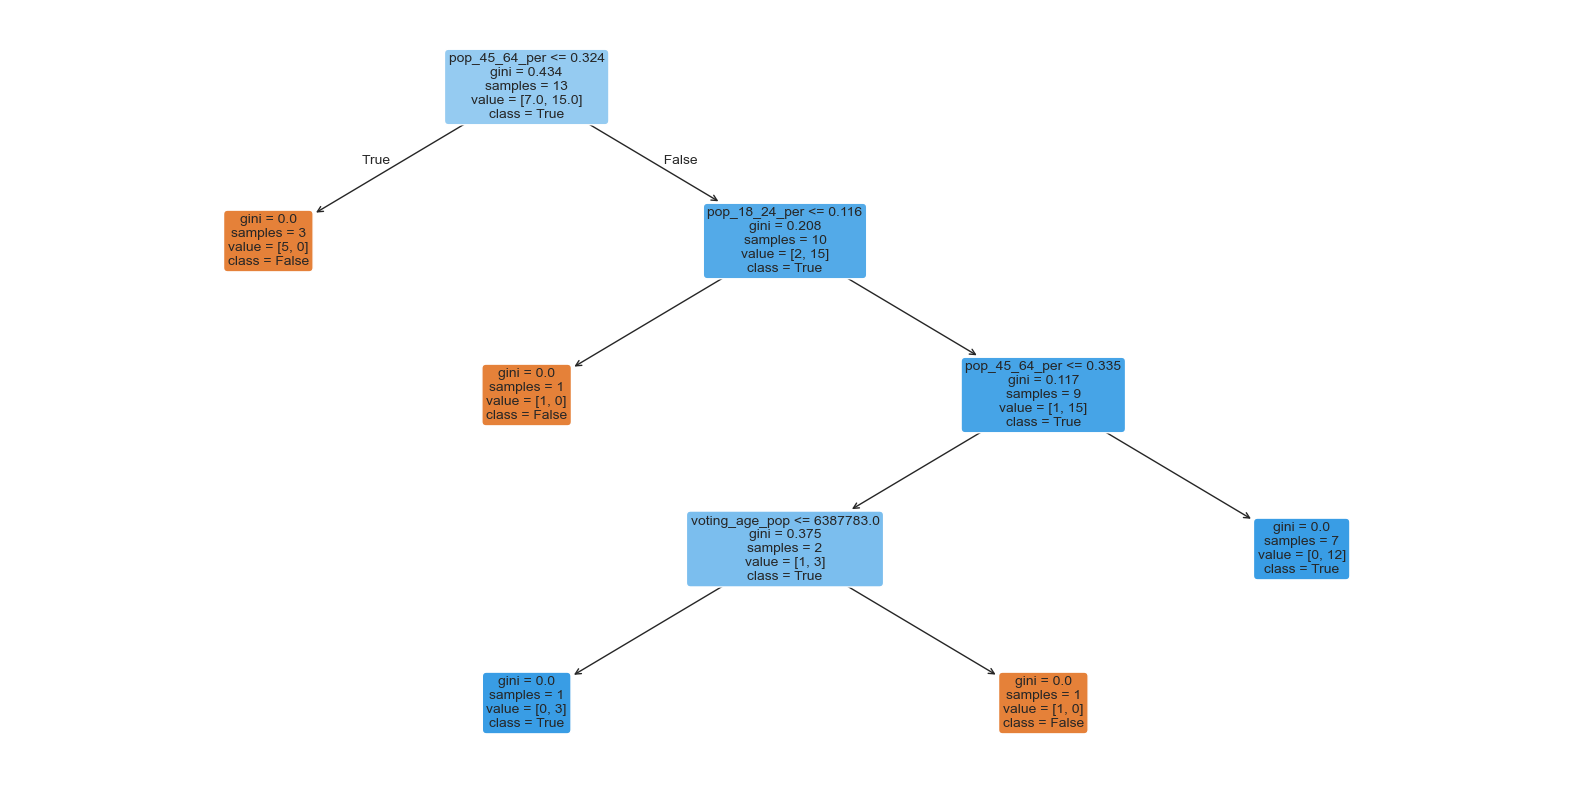

In [74]:
tree = forest_model.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=[str(c) for c in forest_model.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

#### While the weighted average showed improved results compared to the single state model, the accuracy score stayed the same as the single state model, indicating that there is a limitation in that there are only 7 elections assessed in our dataset.

#### With the random forest assessment complete, we can now proceed with our linear regression analysis.

# Linear Regression Model

## Single input models

#### Our linear regression analysis will work on fitting and assessing our models Democrat percentage votes and Republican percentage votes from our input variables using polynoial linear regressions. We will start by measuring median income.

### Median Income Single Inputs

#### Democrat Median Income

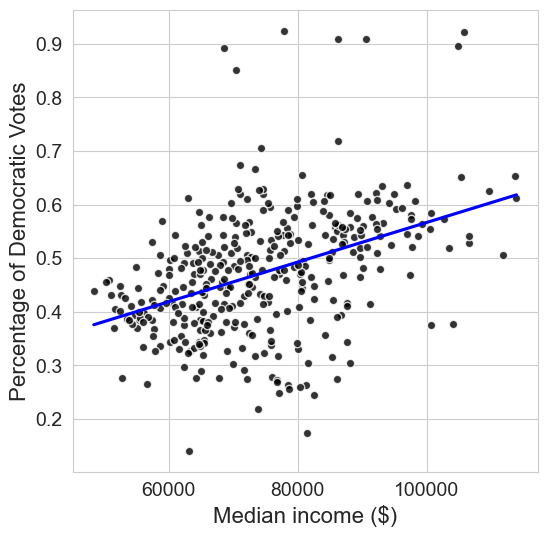

In [75]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x = 'median_income',
            y = 'dem_votes_per',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

#Add axis labels
plt.xlabel('Median income ($)', fontsize=16)
plt.ylabel('Percentage of Democratic Votes', fontsize=16)

#Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

#### This graph here shows our regplot from earlier that showed a moderate correlation between state median income and democratic voting percentage.

In [76]:
df_med_income = df.dropna(subset=['median_income'])

In [77]:
model_median_income = smf.ols(formula='dem_votes_per ~ median_income', data=df_med_income).fit()

In [78]:
print(model_median_income.summary())

                            OLS Regression Results                            
Dep. Variable:          dem_votes_per   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     73.93
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           2.63e-16
Time:                        17:03:59   Log-Likelihood:                 292.75
No. Observations:                 357   AIC:                            -581.5
Df Residuals:                     355   BIC:                            -573.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1965      0.033      6.035

#### The coefficient for median income is very low because the dataset for median income has a much larger dataset. Both P-values for the slope and the intercept are statistically significant.

In [79]:
y_hat = model_median_income.predict()

In [80]:
np.sqrt(mean_squared_error(df_med_income['dem_votes_per'], y_hat)).round(3)

np.float64(0.107)

In [81]:
mean_absolute_error(df_med_income['dem_votes_per'], y_hat)

0.07696970328884095

#### Our root mean squared error and mean squared error show that our predicted model is able to predict these values within 7-11%.

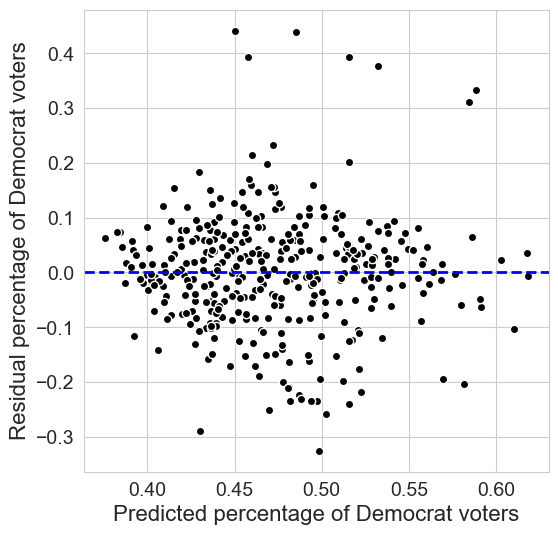

In [82]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat, model_median_income.resid, 'ko', mec='w')
plt.axhline(0, color='b', linestyle='dashed', lw=2)

plt.xlabel('Predicted percentage of Democrat voters', fontsize=16)
plt.ylabel('Residual percentage of Democrat voters', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

#### There isn't too much of a structure in this residual plot, meaning we cannot improve it more by transforming our data.

#### Republican Median Income

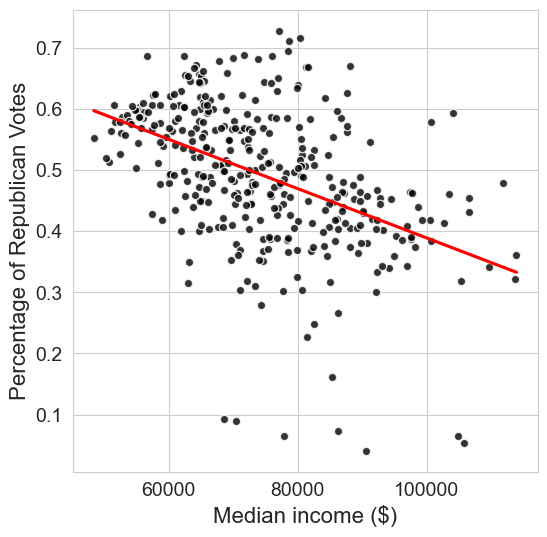

In [83]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x = 'median_income',
            y = 'rep_votes_per',
            color='red',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

#Add axis labels
plt.xlabel('Median income ($)', fontsize=16)
plt.ylabel('Percentage of Republican Votes', fontsize=16)

#Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

#### This graph here shows our regplot from earlier that showed a moderate negative correlation between state median income and Republican voting percentage.

In [84]:
model_median_income = smf.ols(formula='rep_votes_per ~ median_income', data=df_med_income).fit()

In [85]:
print(model_median_income.summary())

                            OLS Regression Results                            
Dep. Variable:          rep_votes_per   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     93.55
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           8.52e-20
Time:                        17:03:59   Log-Likelihood:                 303.99
No. Observations:                 357   AIC:                            -604.0
Df Residuals:                     355   BIC:                            -596.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7925      0.032     25.120

#### The coefficient for median income is very low because the dataset for median income has a much larger dataset. Both P-values for the slope and the intercept are statistically significant.

In [86]:
y_hat = model_median_income.predict()

In [87]:
np.sqrt(mean_squared_error(df_med_income['rep_votes_per'], y_hat)).round(3)

np.float64(0.103)

In [88]:
mean_absolute_error(df_med_income['rep_votes_per'], y_hat)

0.07491077832906702

#### Our root mean squared error and mean squared error show that our predicted model is able to predict these values within 7-11%.

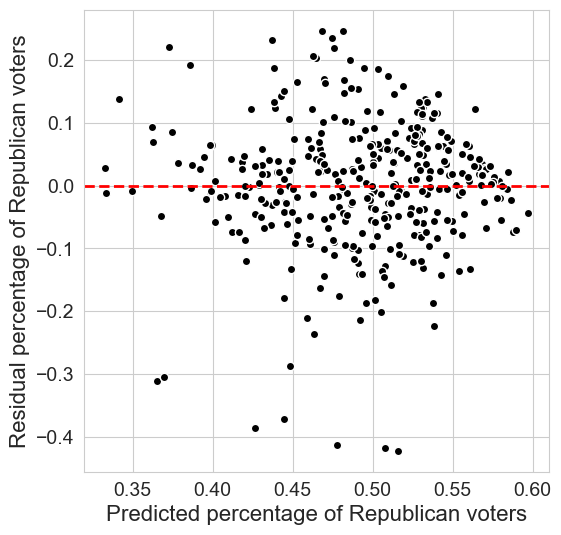

In [89]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat, model_median_income.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted percentage of Republican voters', fontsize=16)
plt.ylabel('Residual percentage of Republican voters', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

#### There isn't too much of a structure in this residual plot and it looks like the inverse of our Democrat data which makes sense in context.

### Unemployment Rate, Voter Participartion, and both voting age categories show similar residual graphs, r-squared values (between 2-20%), p-values (all statistically significant) and root mean and mean absolute error for both the Democrat and Republican datasets.

### The results are listed below for reference, but they are similar to what we saw in the median income results.

### Unemployment Rate Single Inputs

#### Democrat Unemployment Rate

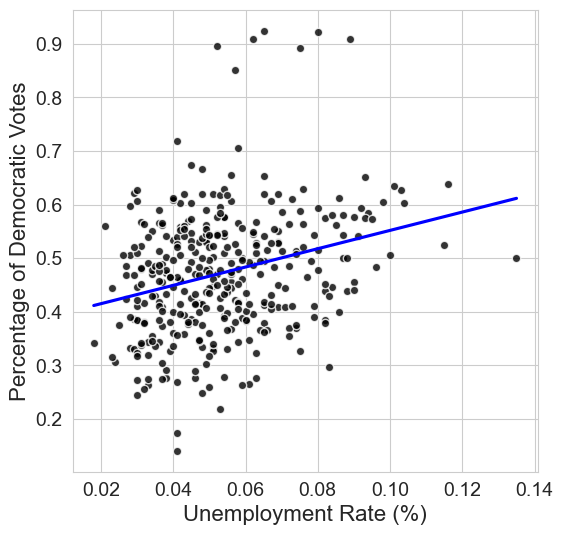

In [90]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x = 'unemployment_rate',
            y = 'dem_votes_per',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

#Add axis labels
plt.xlabel('Unemployment Rate (%)', fontsize=16)
plt.ylabel('Percentage of Democratic Votes', fontsize=16)

#Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

#### This graph here shows our regplot from earlier that showed a weak correlation between state unemployment rate and democratic voting percentage.

In [91]:
df_dem_urate = df.dropna(subset=['unemployment_rate'])

In [92]:
model_dem_urate = smf.ols(formula='dem_votes_per ~ unemployment_rate', data=df_dem_urate).fit()

In [93]:
print(model_dem_urate.summary())

                            OLS Regression Results                            
Dep. Variable:          dem_votes_per   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     29.12
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           1.25e-07
Time:                        17:03:59   Log-Likelihood:                 273.05
No. Observations:                 357   AIC:                            -542.1
Df Residuals:                     355   BIC:                            -534.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.3807      0.01

In [94]:
y_hat = model_dem_urate.predict()

In [95]:
np.sqrt(mean_squared_error(df_dem_urate['dem_votes_per'], y_hat)).round(3)

np.float64(0.113)

In [96]:
mean_absolute_error(df_dem_urate['dem_votes_per'], y_hat)

0.08704922671790592

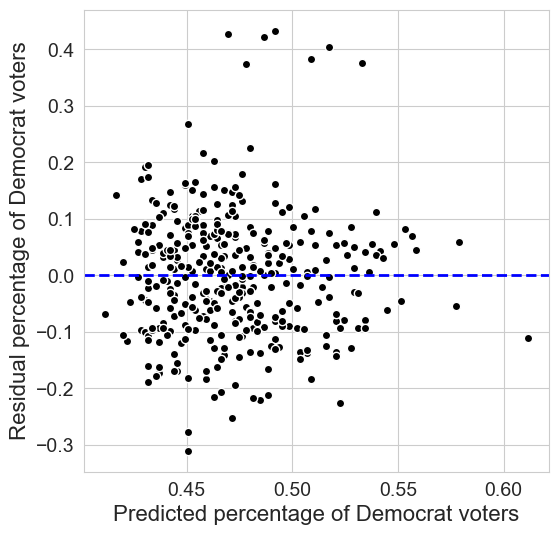

In [97]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat, model_dem_urate.resid, 'ko', mec='w')
plt.axhline(0, color='b', linestyle='dashed', lw=2)

plt.xlabel('Predicted percentage of Democrat voters', fontsize=16)
plt.ylabel('Residual percentage of Democrat voters', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

#### Republican Unemployment Rate

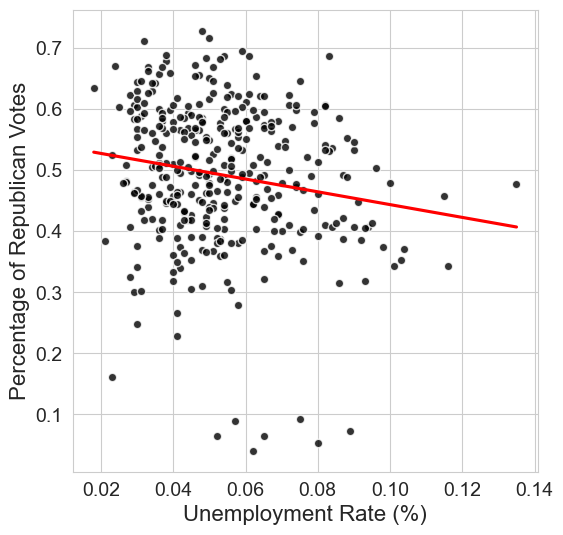

In [98]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x = 'unemployment_rate',
            y = 'rep_votes_per',
            color='red',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

#Add axis labels
plt.xlabel('Unemployment Rate (%)', fontsize=16)
plt.ylabel('Percentage of Republican Votes', fontsize=16)

#Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

#### This graph here shows our regplot from earlier that showed a weak correlation between state unemployment rate and Republican voting percentage.

In [99]:
df_rep_urate = df.dropna(subset=['unemployment_rate'])

In [100]:
model_rep_urate = smf.ols(formula='rep_votes_per ~ unemployment_rate', data=df_rep_urate).fit()

In [101]:
print(model_rep_urate.summary())

                            OLS Regression Results                            
Dep. Variable:          rep_votes_per   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     10.57
Date:                Thu, 11 Dec 2025   Prob (F-statistic):            0.00126
Time:                        17:04:00   Log-Likelihood:                 267.47
No. Observations:                 357   AIC:                            -530.9
Df Residuals:                     355   BIC:                            -523.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.5479      0.01

In [102]:
y_hat = model_rep_urate.predict()

In [103]:
np.sqrt(mean_squared_error(df_rep_urate['rep_votes_per'], y_hat)).round(3)

np.float64(0.114)

In [104]:
mean_absolute_error(df_dem_urate['rep_votes_per'], y_hat)

0.08896018040039533

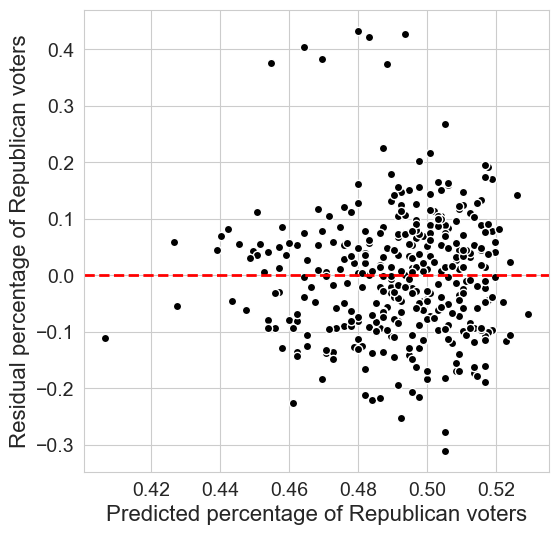

In [105]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat, model_dem_urate.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted percentage of Republican voters', fontsize=16)
plt.ylabel('Residual percentage of Republican voters', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

### Voting Participation Rate Single Inputs

#### Democrat Voting Participation Rate

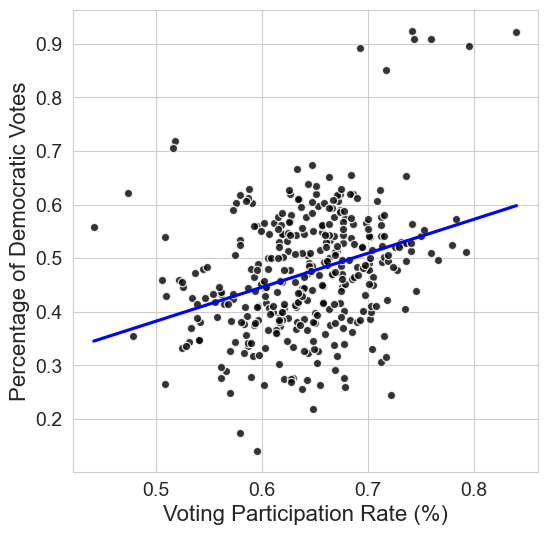

In [106]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x = 'voter_participation',
            y = 'dem_votes_per',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

#Add axis labels
plt.xlabel('Voting Participation Rate (%)', fontsize=16)
plt.ylabel('Percentage of Democratic Votes', fontsize=16)

#Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

In [107]:
df_dem_vrate = df.dropna(subset=['voter_participation'])

In [108]:
model_dem_vrate = smf.ols(formula='dem_votes_per ~ voter_participation', data=df_dem_vrate).fit()

In [109]:
print(model_dem_vrate.summary())

                            OLS Regression Results                            
Dep. Variable:          dem_votes_per   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     40.79
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           5.33e-10
Time:                        17:04:00   Log-Likelihood:                 278.39
No. Observations:                 357   AIC:                            -552.8
Df Residuals:                     355   BIC:                            -545.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0654    

In [110]:
y_hat = model_dem_vrate.predict()

In [111]:
np.sqrt(mean_squared_error(df_dem_vrate['dem_votes_per'], y_hat)).round(3)

np.float64(0.111)

In [112]:
mean_absolute_error(df_dem_vrate['dem_votes_per'], y_hat)

0.08407420356213449

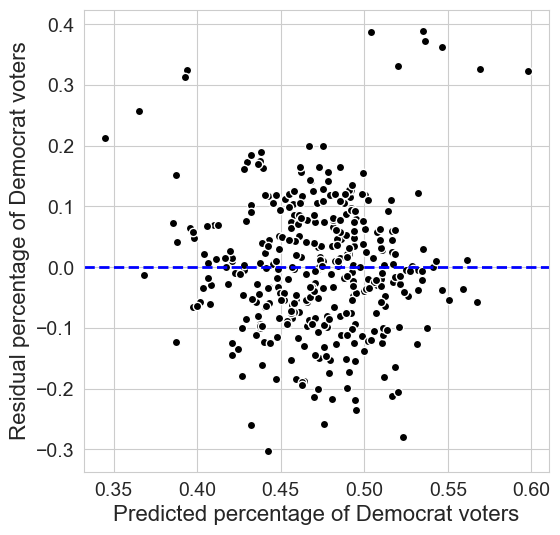

In [113]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat, model_dem_vrate.resid, 'ko', mec='w')
plt.axhline(0, color='b', linestyle='dashed', lw=2)

plt.xlabel('Predicted percentage of Democrat voters', fontsize=16)
plt.ylabel('Residual percentage of Democrat voters', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

#### Republican Voting Participation Rate

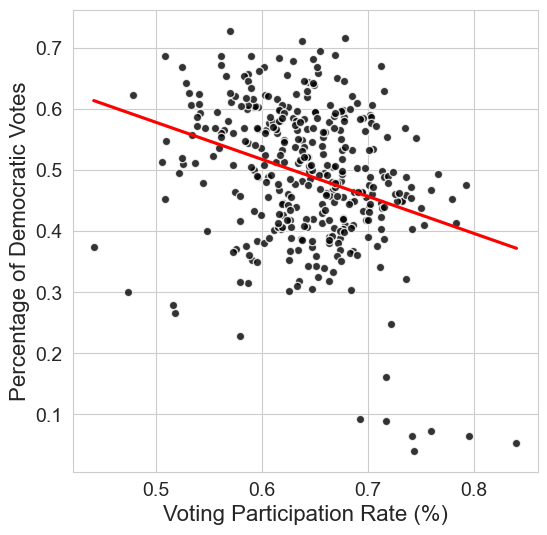

In [114]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x = 'voter_participation',
            y = 'rep_votes_per',
            color='red',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

#Add axis labels
plt.xlabel('Voting Participation Rate (%)', fontsize=16)
plt.ylabel('Percentage of Democratic Votes', fontsize=16)

#Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

In [115]:
df_rep_vrate = df.dropna(subset=['voter_participation'])

In [116]:
model_rep_vrate = smf.ols(formula='rep_votes_per ~ voter_participation', data=df_rep_vrate).fit()

In [117]:
print(model_rep_vrate.summary())

                            OLS Regression Results                            
Dep. Variable:          rep_votes_per   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     37.62
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           2.30e-09
Time:                        17:04:00   Log-Likelihood:                 280.21
No. Observations:                 357   AIC:                            -556.4
Df Residuals:                     355   BIC:                            -548.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.8806    

In [118]:
y_hat = model_rep_vrate.predict()

In [119]:
np.sqrt(mean_squared_error(df_rep_vrate['rep_votes_per'], y_hat)).round(3)

np.float64(0.11)

In [120]:
mean_absolute_error(df_rep_vrate['rep_votes_per'], y_hat)

0.08509003701171323

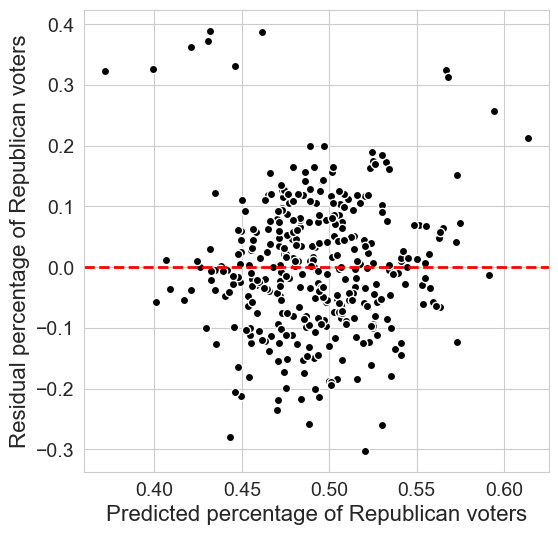

In [121]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat, model_dem_vrate.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted percentage of Republican voters', fontsize=16)
plt.ylabel('Residual percentage of Republican voters', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

### Voting Age 18-24 Single Inputs

#### Democrat Voting Age 18-24 Single Inputs

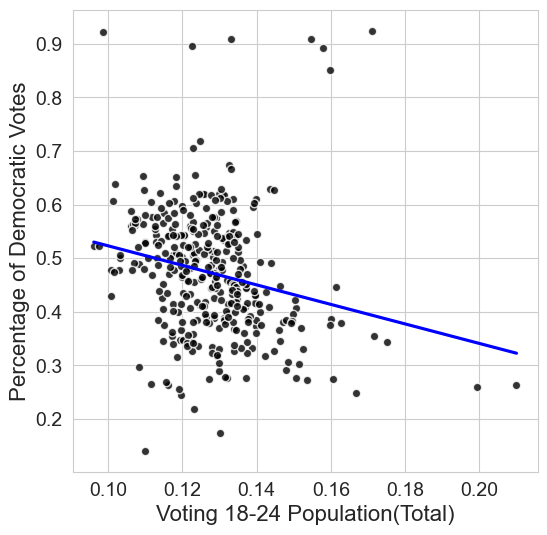

In [122]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x = 'pop_18_24_per',
            y = 'dem_votes_per',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

#Add axis labels
plt.xlabel('Voting 18-24 Population(Total)', fontsize=16)
plt.ylabel('Percentage of Democratic Votes', fontsize=16)

#Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

In [123]:
df_dem_1824 = df.dropna(subset=['pop_18_24_per'])

In [124]:
model_dem_1824 = smf.ols(formula='dem_votes_per ~ pop_18_24_per', data=df_dem_1824).fit()

In [125]:
print(model_dem_1824.summary())

                            OLS Regression Results                            
Dep. Variable:          dem_votes_per   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     17.93
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           2.92e-05
Time:                        17:04:01   Log-Likelihood:                 267.78
No. Observations:                 357   AIC:                            -531.6
Df Residuals:                     355   BIC:                            -523.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7050      0.055     12.743

In [126]:
y_hat = model_dem_1824.predict()

In [127]:
np.sqrt(mean_squared_error(df_dem_1824['dem_votes_per'], y_hat)).round(3)

np.float64(0.114)

In [128]:
mean_absolute_error(df_dem_1824['dem_votes_per'], y_hat)

0.08313630369233875

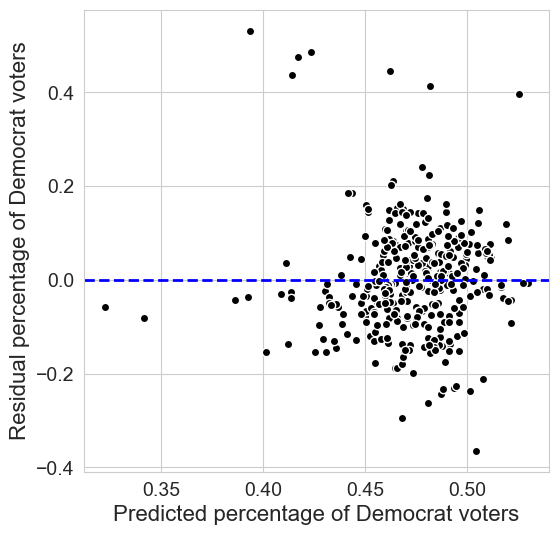

In [129]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat, model_dem_1824.resid, 'ko', mec='w')
plt.axhline(0, color='b', linestyle='dashed', lw=2)

plt.xlabel('Predicted percentage of Democrat voters', fontsize=16)
plt.ylabel('Residual percentage of Democrat voters', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

#### Republican Voting Age 18-24 Single Inputs

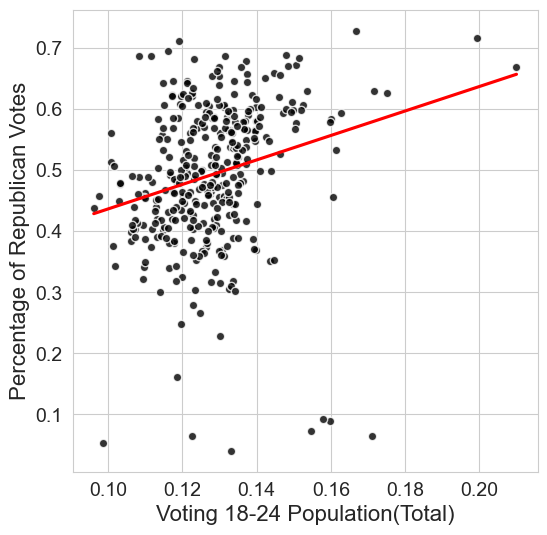

In [130]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x = 'pop_18_24_per',
            y = 'rep_votes_per',
            color='red',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

#Add axis labels
plt.xlabel('Voting 18-24 Population(Total)', fontsize=16)
plt.ylabel('Percentage of Republican Votes', fontsize=16)

#Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

In [131]:
df_rep_1824 = df.dropna(subset=['pop_18_24_per'])

In [132]:
model_rep_1824 = smf.ols(formula='rep_votes_per ~ pop_18_24_per', data=df_rep_1824).fit()

In [133]:
print(model_rep_1824.summary())

                            OLS Regression Results                            
Dep. Variable:          rep_votes_per   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     22.31
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           3.34e-06
Time:                        17:04:01   Log-Likelihood:                 273.11
No. Observations:                 357   AIC:                            -542.2
Df Residuals:                     355   BIC:                            -534.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2361      0.055      4.331

In [134]:
y_hat = model_rep_1824.predict()

In [135]:
np.sqrt(mean_squared_error(df_rep_1824['rep_votes_per'], y_hat)).round(3)

np.float64(0.113)

In [136]:
mean_absolute_error(df_rep_1824['rep_votes_per'], y_hat)

0.08291945425360453

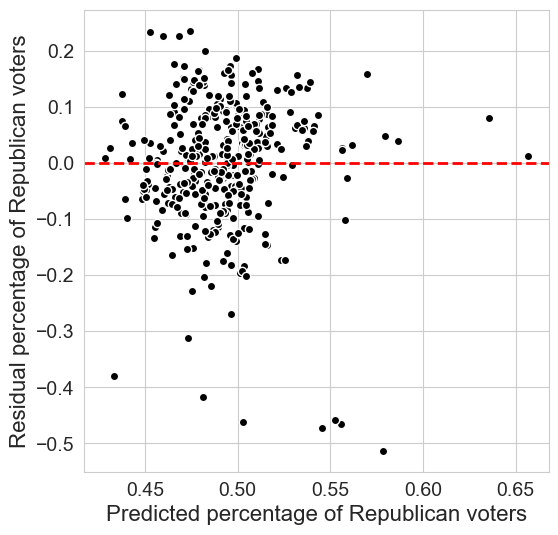

In [137]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat, model_rep_1824.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted percentage of Republican voters', fontsize=16)
plt.ylabel('Residual percentage of Republican voters', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

### Voting Age 65+ Single Inputs

#### Democrat Voting Age 65+ Single Inputs

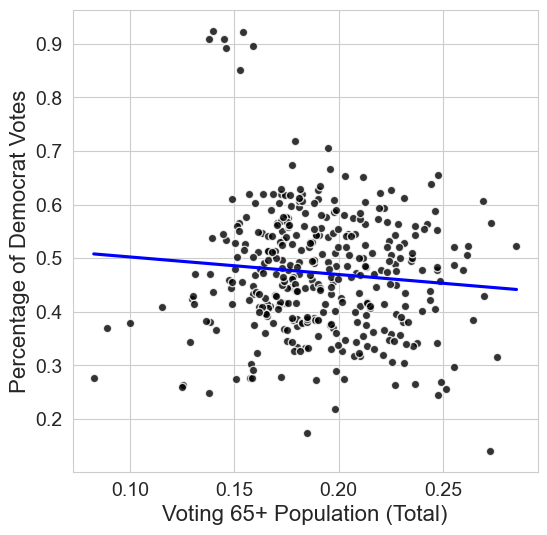

In [138]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x = 'pop_65_per',
            y = 'dem_votes_per',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

#Add axis labels
plt.xlabel('Voting 65+ Population (Total)', fontsize=16)
plt.ylabel('Percentage of Democrat Votes', fontsize=16)

#Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

In [139]:
df_dem_65 = df.dropna(subset=['pop_65_per'])

In [140]:
model_dem_65 = smf.ols(formula='dem_votes_per ~ pop_65_per', data=df_dem_65).fit()

In [141]:
print(model_dem_65.summary())

                            OLS Regression Results                            
Dep. Variable:          dem_votes_per   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.062
Date:                Thu, 11 Dec 2025   Prob (F-statistic):             0.0810
Time:                        17:04:01   Log-Likelihood:                 260.51
No. Observations:                 357   AIC:                            -517.0
Df Residuals:                     355   BIC:                            -509.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5348      0.036     14.724      0.0

In [142]:
y_hat = model_dem_65.predict()

In [143]:
np.sqrt(mean_squared_error(df_dem_65['dem_votes_per'], y_hat)).round(3)

np.float64(0.117)

In [144]:
mean_absolute_error(df_dem_65['dem_votes_per'], y_hat)

0.09081104161266193

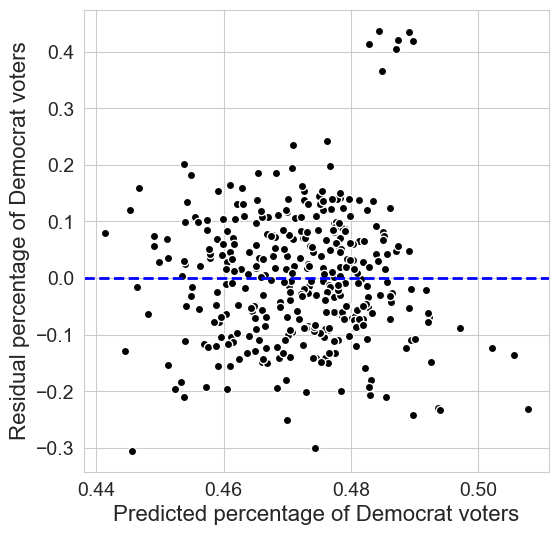

In [145]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat, model_dem_65.resid, 'ko', mec='w')
plt.axhline(0, color='b', linestyle='dashed', lw=2)

plt.xlabel('Predicted percentage of Democrat voters', fontsize=16)
plt.ylabel('Residual percentage of Democrat voters', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

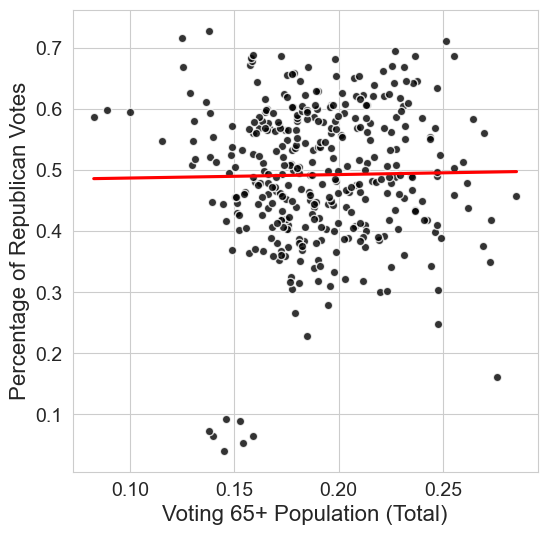

In [205]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x = 'pop_65_per',
            y = 'rep_votes_per',
            color='red',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

#Add axis labels
plt.xlabel('Voting 65+ Population (Total)', fontsize=16)
plt.ylabel('Percentage of Republican Votes', fontsize=16)

#Increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

In [206]:
df_rep_65 = df.dropna(subset=['pop_65_per'])

In [207]:
model_rep_65 = smf.ols(formula='rep_votes_per ~ pop_65_per', data=df_rep_65).fit()

In [208]:
print(model_rep_65.summary())

                            OLS Regression Results                            
Dep. Variable:          rep_votes_per   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.09265
Date:                Thu, 11 Dec 2025   Prob (F-statistic):              0.761
Time:                        17:05:15   Log-Likelihood:                 262.28
No. Observations:                 357   AIC:                            -520.6
Df Residuals:                     355   BIC:                            -512.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4811      0.036     13.313      0.0

In [209]:
y_hat = model_rep_65.predict()

In [210]:
np.sqrt(mean_squared_error(df_rep_65['rep_votes_per'], y_hat)).round(3)

np.float64(0.116)

In [211]:
mean_absolute_error(df_rep_65['rep_votes_per'], y_hat)

0.09029526071725422

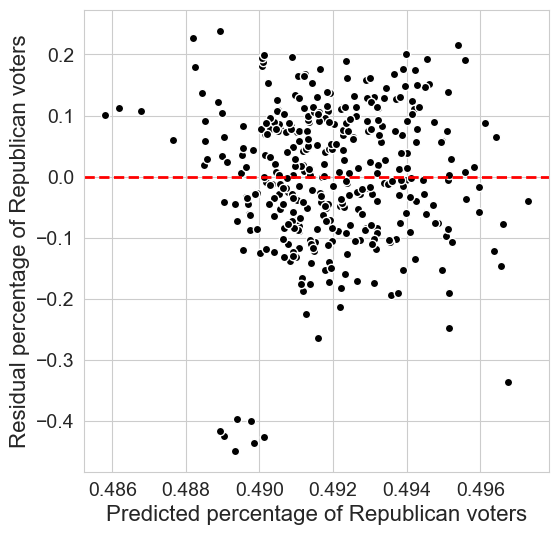

In [212]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat, model_rep_65.resid, 'ko', mec='w')
plt.axhline(0, color='red', linestyle='dashed', lw=2)

plt.xlabel('Predicted percentage of Republican voters', fontsize=16)
plt.ylabel('Residual percentage of Republican voters', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

### With our single input analysis complete, we can now proceed to our multiple linear regression model.

## Multiple Linear Regression Model

#### For our multiple linear regression model, we will start by looking at the numerical predictors that we assessed to see if there are any non-statistically significant values that we should not use in our overall multiple linear regression analysis.

In [154]:
model_dem = smf.ols(
    formula='dem_votes_per ~ unemployment_rate + median_income + med_age + bach_per + voting_age_pop + pop_18_24_per + pop_25_44_per + pop_45_64_per + pop_65_per + voter_participation',
    data=df).fit()

In [155]:
print(model_dem.summary())

                            OLS Regression Results                            
Dep. Variable:          dem_votes_per   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     23.61
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           1.82e-32
Time:                        17:04:02   Log-Likelihood:                 320.39
No. Observations:                 306   AIC:                            -618.8
Df Residuals:                     295   BIC:                            -577.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1092.0927    

#### The R-squared value here is .445, indicating a moderate strength between our model and Democrat voting percentage. The moderate strength can be partly described as this analysis not being a completely comprehensive list of predictors for Democrat voting percentage. Some of these factors that might have allowed us to get a more complete picture, but were not included were data on government assistance programs, and possibly medicare data as well. 

#### Voting age population shows up as not statistically significant here, and median age also showed up as statistically insignificant, but had a comparatively higher p-value.

In [156]:
y_hat = model_dem.predict()

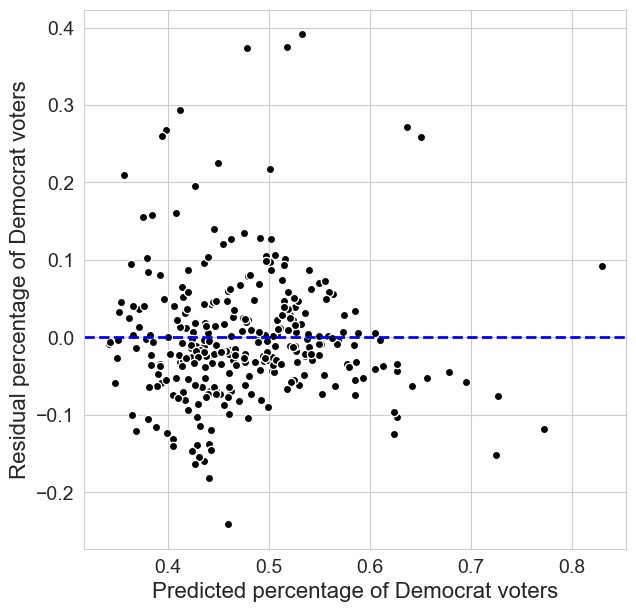

In [157]:
plt.figure(figsize=(7, 7))

plt.plot(y_hat, model_dem.resid, 'ko', mec='w')
plt.axhline(0, color='b', linestyle='dashed', lw=2)

plt.xlabel('Predicted percentage of Democrat voters', fontsize=16)
plt.ylabel('Residual percentage of Democrat voters', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

#### The residual shows up as mostly evenly spaced so our model is likely optimized here regarding residuals.

#### We will now look at the multiple linear regression model for Republican voting percentage.

In [158]:
model_rep = smf.ols(
    formula='rep_votes_per ~ unemployment_rate + median_income + med_age + bach_per + voting_age_pop + pop_18_24_per + pop_25_44_per + pop_45_64_per + pop_65_per + voter_participation',
    data=df).fit()

In [159]:
print(model_rep.summary())

                            OLS Regression Results                            
Dep. Variable:          rep_votes_per   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     19.93
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           5.05e-28
Time:                        17:04:02   Log-Likelihood:                 312.44
No. Observations:                 306   AIC:                            -602.9
Df Residuals:                     295   BIC:                            -561.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1236.7355    

#### The R-squared value here is .445, indicating a moderate strength between our model and Republican voting percentage. This r-squared value was also weaker compared to Democrat voting percentage. 
#### Voting age population and median age show up as not statisitically significant here, and percentage of bachelor degrees attained also showed up as statistically significantly, but had a comparatively higher p-value.

In [160]:
y_hat = model_rep.predict()

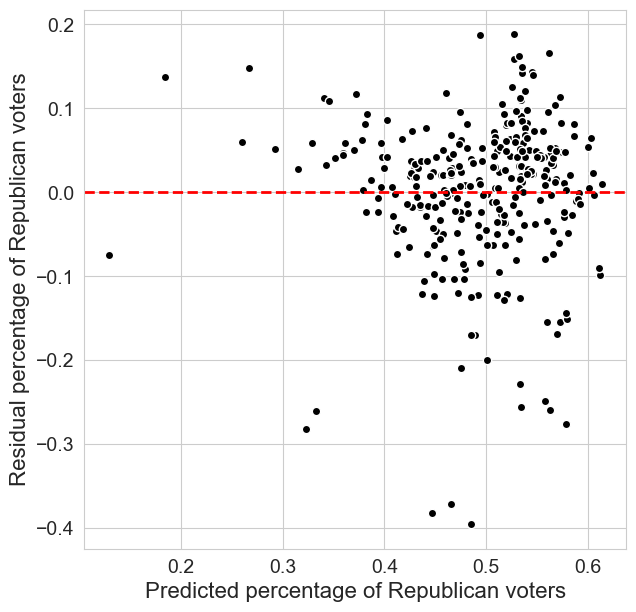

In [161]:
plt.figure(figsize=(7, 7))

plt.plot(y_hat, model_rep.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted percentage of Republican voters', fontsize=16)
plt.ylabel('Residual percentage of Republican voters', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

#### Our residual plot shows an inverse relationship with our Democrat data, which we would expect for our data.

### Reduced Model

#### For our Democrat reduced model, we will look into unemployment rate, median income, percentage of bachelor's degrees attained, 18-24 and 65+ population voting percentages, and voter participation.

#### Democrat

In [162]:
model_dem_reduced = smf.ols(
    formula='dem_votes_per ~ unemployment_rate + median_income + bach_per + pop_18_24_per + pop_65_per + voter_participation',
    data=df).fit()

In [163]:
print(model_dem_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:          dem_votes_per   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     37.30
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           6.48e-35
Time:                        17:04:02   Log-Likelihood:                 347.22
No. Observations:                 357   AIC:                            -680.4
Df Residuals:                     350   BIC:                            -653.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.3634    

#### Our r-squared value is reduced here because we removed the statistically significant factors of 25-44 age range and 45-64 age range to reduce multicollinearity. However, the r-squared value is still relatively close to our original value in the full model.
#### Each of our variables here are statistically significant.
#### The note around multicollinearity likely relates to the population 18-24 and 65+ age ranges being related.
#### The next step is setting up the residual plot.

In [164]:
y_hat = model_dem_reduced.predict()

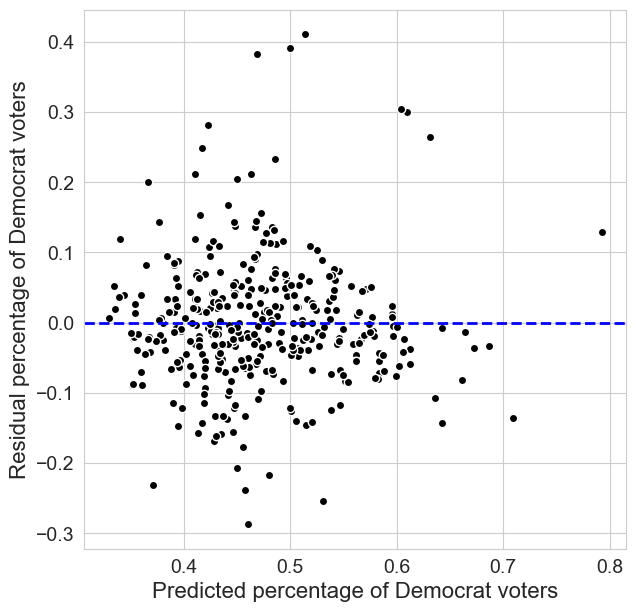

In [165]:
plt.figure(figsize=(7, 7))

plt.plot(y_hat, model_dem_reduced.resid, 'ko', mec='w')
plt.axhline(0, color='b', linestyle='dashed', lw=2)

plt.xlabel('Predicted percentage of Democrat voters', fontsize=16)
plt.ylabel('Residual percentage of Democrat voters', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()


#### This residual plot does not have a structure, and we have used our input variables to the best of our abilities.

In [166]:
mean_absolute_error(df.loc[model_dem.fittedvalues.index, 'dem_votes_per'], model_dem_reduced.predict(df.loc[model_dem.fittedvalues.index]))

0.06342573086216792

In [167]:
mae_full = mean_absolute_error(df.loc[model_dem.fittedvalues.index, 'dem_votes_per'], model_dem.fittedvalues)
mae_reduced = mean_absolute_error(df.loc[model_dem_reduced.fittedvalues.index, 'dem_votes_per'], model_dem_reduced.fittedvalues)

r2_full = model_dem.rsquared
r2_reduced = model_dem_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_full, mae_reduced],
              'R-squared': [r2_full, r2_reduced]},
             index=['full model', 'reduced model']).round(4)

Mean Absolute Error  R-squared
full model                  0.0588     0.4446
reduced model               0.0649     0.3900

In [168]:
anova_lm(model_dem_reduced, model_dem)

df_resid       ssr  df_diff   ss_diff        F    Pr(>F)
0     350.0  2.988089      0.0       NaN      NaN       NaN
1     295.0  2.206996     55.0  0.781093  1.89828  0.000401

#### Our r-squared value is lower and our mean absolute error is higher is reduced here because we removed the statistically significant factors of 25-44 age range and 45-64 age range to reduce multicollinearity, along with non-statistically significant factors. These decisions also explain the P-value being statistically significant.

#### Republican

In [169]:
model_rep_reduced = smf.ols(
    formula='rep_votes_per ~ unemployment_rate + median_income + pop_18_24_per + pop_65_per + voter_participation',
    data=df).fit()

In [170]:
print(model_rep_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:          rep_votes_per   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     33.59
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           5.23e-28
Time:                        17:04:02   Log-Likelihood:                 332.03
No. Observations:                 357   AIC:                            -652.1
Df Residuals:                     351   BIC:                            -628.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5720    

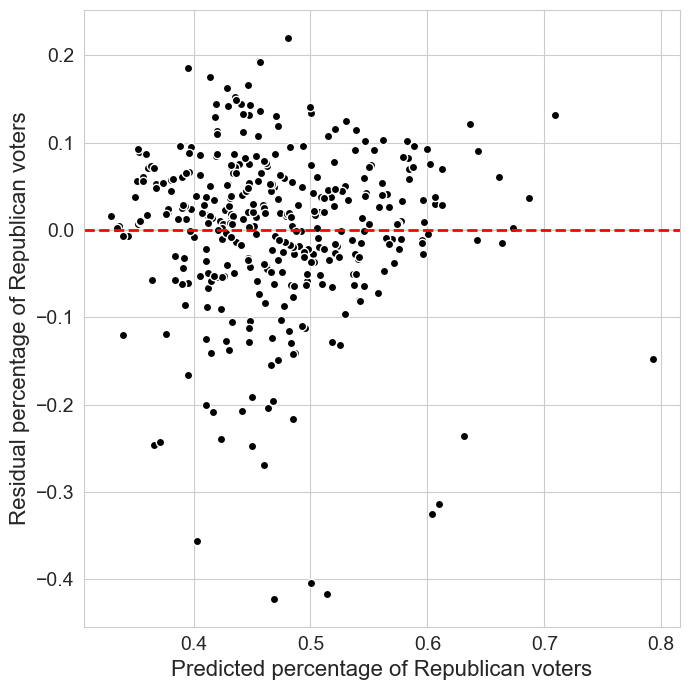

In [171]:
plt.figure(figsize=(7, 7))

plt.plot(y_hat, model_rep_reduced.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted percentage of Republican voters', fontsize=16)
plt.ylabel('Residual percentage of Republican voters', fontsize=16)

plt.tick_params(labelsize=14)

plt.tight_layout()
plt.show()

#### This residual plot does not have a structure, and we have used our input variables to the best of our abilities.

In [172]:
mean_absolute_error(df.loc[model_rep.fittedvalues.index, 'rep_votes_per'], model_rep_reduced.predict(df.loc[model_rep.fittedvalues.index]))

0.06602970431256457

In [173]:
mae_full = mean_absolute_error(df.loc[model_rep.fittedvalues.index, 'rep_votes_per'], model_rep.fittedvalues)
mae_reduced = mean_absolute_error(df.loc[model_rep_reduced.fittedvalues.index, 'rep_votes_per'], model_rep_reduced.fittedvalues)

r2_full = model_rep.rsquared
r2_reduced = model_rep_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_full, mae_reduced],
              'R-squared': [r2_full, r2_reduced]},
             index=['full model', 'reduced model']).round(4)

Mean Absolute Error  R-squared
full model                  0.0618     0.4032
reduced model               0.0685     0.3236

In [174]:
anova_lm(model_rep_reduced, model_rep)

df_resid       ssr  df_diff   ss_diff         F    Pr(>F)
0     351.0  3.253572      0.0       NaN       NaN       NaN
1     295.0  2.324763     56.0  0.928809  2.104658  0.000039

#### We see a similar relationship with the Republican reduced model as well. Our r-squared value is lower and our mean absolute error is higher because we removed the statistically significant factors of 25-44 age range and 45-64 age range to reduce multicollinearity, along with non-statistically significant factors. These decisions also explain the P-value being statistically significant.

#### To gain a greater understanding of the relative impact of our variables on the predicted outcome, we can use a scaling methodology to standardize our variables coefficients.

### Scaling

#### We will scale each predictor to a mean of 0 and standard deviation of 1 to interpret the size of our coefficients as a reflection of each variable’s relative influence on election voting percentage.
#### Our scaled model will start with the Democrat model, and will use the predictor variables of unemployment rate, median income, bach_per, population 18-24, population 65+, and voter participation.

##### Democrat

In [175]:
predictor_variables = ['unemployment_rate', 'median_income', 'bach_per', 'pop_65_per', 'voter_participation', 'pop_18_24_per']

In [176]:
scaled_columns = [var + '_normalized' for var in predictor_variables]
print(scaled_columns)

['unemployment_rate_normalized', 'median_income_normalized', 'bach_per_normalized', 'pop_65_per_normalized', 'voter_participation_normalized', 'pop_18_24_per_normalized']


In [177]:
scaler = StandardScaler().fit(df[predictor_variables])

df_scaled = df.copy()

#### The StandardScaler helps transform our data to a mean of 0 and a standard deviation of 1.

In [178]:
df_scaled[scaled_columns] = scaler.transform(df_scaled[predictor_variables])

In [179]:
df_scaled[scaled_columns].agg(['mean','std']).round(3)

unemployment_rate_normalized  median_income_normalized  \
mean                        -0.000                     0.000   
std                          1.001                     1.001   

      bach_per_normalized  pop_65_per_normalized  \
mean                0.000                  0.000   
std                 1.001                  1.001   

      voter_participation_normalized  pop_18_24_per_normalized  
mean                          -0.000                     0.000  
std                            1.001                     1.001

#### With our predictors set, we can now fit the linear regression model.

In [180]:
formula_norm = 'dem_votes_per ~ ' + ' + '.join(scaled_columns)
model_normalized = smf.ols(formula=formula_norm, data=df_scaled).fit()

In [181]:
print(model_normalized.summary())

                            OLS Regression Results                            
Dep. Variable:          dem_votes_per   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     37.30
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           6.48e-35
Time:                        17:04:03   Log-Likelihood:                 347.22
No. Observations:                 357   AIC:                            -680.4
Df Residuals:                     350   BIC:                            -653.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

#### For a 1 unit increase in unemployment rate, holding everything constant, we would expect to see a 4.01% increase in democratic voting percentage.
#### For a 1 unit increase in median income, holding everything constant, we would expect to see a 5.07% increase in democratic voting percentage. This is the strongest predictor for our Democrat model.
#### For a 1 unit increase in the percentage of bachelor degrees attained, holding everything constant, we would expect to see a 2.00% decrease in democratic voting percentage.
#### For a 1 unit increase in the 65+ voting population, holding everything constant, we would expect to see a 3.07% increase in democratic voting percentage.
#### For a 1 unit increase in voter participation, holding everything constant, we would expect to see a 1.91% increase in democratic voting percentage.
#### For a 1 unit increase in the 18-24 voting population, holding everything constant, we would expect to see a 2.83% decrease in democratic voting percentage.

In [182]:
mae_normalized = mean_absolute_error(df_scaled.loc[model_normalized.fittedvalues.index, 'dem_votes_per'], model_normalized.fittedvalues)
mae_reduced = mean_absolute_error(df.loc[model_dem_reduced.fittedvalues.index, 'dem_votes_per'], model_dem_reduced.fittedvalues)

r2_normalized = model_normalized.rsquared
r2_reduced = model_dem_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_normalized, mae_reduced],
              'R-squared': [r2_normalized, r2_reduced]},
             index=['normalized model', 'reduced model']).round(4)

Mean Absolute Error  R-squared
normalized model               0.0649       0.39
reduced model                  0.0649       0.39

#### We were able to confirm that our normalized Republican model is equal to our reduced model here.

##### Republican

In [183]:
predictor_variables = ['unemployment_rate', 'median_income', 'pop_65_per', 'voter_participation', 'pop_18_24_per']

In [184]:
scaled_columns = [var + '_normalized' for var in predictor_variables]
print(scaled_columns)

['unemployment_rate_normalized', 'median_income_normalized', 'pop_65_per_normalized', 'voter_participation_normalized', 'pop_18_24_per_normalized']


In [185]:
scaler = StandardScaler().fit(df_scaled[predictor_variables])

In [186]:
df_scaled[scaled_columns] = scaler.transform(df_scaled[predictor_variables])

In [187]:
df_scaled[scaled_columns].agg(['mean','std']).round(3)

unemployment_rate_normalized  median_income_normalized  \
mean                        -0.000                     0.000   
std                          1.001                     1.001   

      pop_65_per_normalized  voter_participation_normalized  \
mean                  0.000                          -0.000   
std                   1.001                           1.001   

      pop_18_24_per_normalized  
mean                     0.000  
std                      1.001

In [188]:
formula_norm = 'rep_votes_per ~ ' + ' + '.join(scaled_columns)
model_normalized = smf.ols(formula=formula_norm, data=df_scaled).fit()

In [189]:
print(model_normalized.summary())

                            OLS Regression Results                            
Dep. Variable:          rep_votes_per   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     33.59
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           5.23e-28
Time:                        17:04:03   Log-Likelihood:                 332.03
No. Observations:                 357   AIC:                            -652.1
Df Residuals:                     351   BIC:                            -628.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

#### For a 1 unit increase in unemployment rate, holding everything constant, we would expect to see a 1.93% decrease in Republican voting percentage.
#### For a 1 unit increase in median income, holding everything constant, we would expect to see a 4.66% decrease in Republican voting percentage. This is the strongest predictor for our Republican model.
#### For a 1 unit increase in the 65+ voting population, holding everything constant, we would expect to see a 2.90% increase in Republican voting percentage.
#### For a 1 unit increase in voter participation, holding everything constant, we would expect to see a 1.77% decrease in Republican voting percentage.
#### For a 1 unit increase in the 18-24 voting population, holding everything constant, we would expect to see a 2.90% increase in Republican voting percentage.

In [190]:
mae_normalized = mean_absolute_error(df_scaled.loc[model_normalized.fittedvalues.index, 'rep_votes_per'], model_normalized.fittedvalues)
mae_reduced = mean_absolute_error(df.loc[model_rep_reduced.fittedvalues.index, 'rep_votes_per'], model_rep_reduced.fittedvalues)

r2_normalized = model_normalized.rsquared
r2_reduced = model_rep_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_normalized, mae_reduced],
              'R-squared': [r2_normalized, r2_reduced]},
             index=['normalized model', 'reduced model']).round(4)

Mean Absolute Error  R-squared
normalized model               0.0685     0.3236
reduced model                  0.0685     0.3236

#### We were able to confirm that our normalized Republican model is equal to our reduced model here.

## Swing State Models

#### We almost want to see if the swing states that we looked at earlier have different predictors that are relevant, and how modelling just these states will compare.

In [191]:
model_dem_swing = smf.ols(
    formula='dem_votes_per ~ unemployment_rate + median_income + med_age + bach_per + voting_age_pop + pop_18_24_per + pop_25_44_per + pop_45_64_per + pop_65_per + voter_participation',
    data=df_swing).fit()

print(model_dem_swing.summary())

                            OLS Regression Results                            
Dep. Variable:          dem_votes_per   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     2.475
Date:                Thu, 11 Dec 2025   Prob (F-statistic):             0.0641
Time:                        17:04:03   Log-Likelihood:                 61.272
No. Observations:                  24   AIC:                            -100.5
Df Residuals:                      13   BIC:                            -87.58
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2085.5167   1

#### Here, we can see that the only predictor that is statistically significant is unemployment rate, with the population percentages also being close to statistically significant, but heavily correlated with each other and so not quite. It is interesting to note that the r-squared value is much higher, but this is probably due to the fact that there are only 5 states in this dataframe, so a much smaller number of data points.

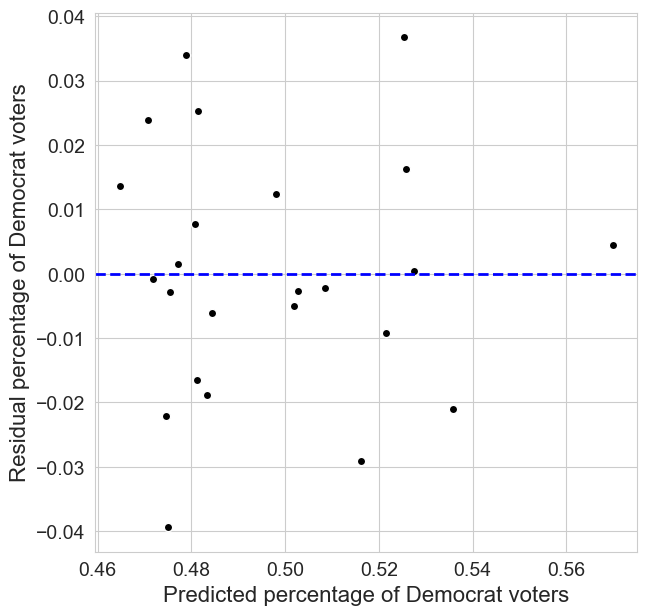

In [192]:
y_hat = model_dem_swing.predict()

plt.figure(figsize=(7, 7))

plt.plot(y_hat, model_dem_swing.resid, 'ko', mec='w')
plt.axhline(0, color='b', linestyle='dashed', lw=2)

plt.xlabel('Predicted percentage of Democrat voters', fontsize=16)
plt.ylabel('Residual percentage of Democrat voters', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

#### The residual shows up as mostly evenly spaced so our model is likely optimized here regarding residuals.

#### We will now look at the multiple linear regression model for Republican voting percentage.

In [193]:
model_rep_swing = smf.ols(
    formula='rep_votes_per ~ unemployment_rate + median_income + med_age + bach_per + voting_age_pop + pop_18_24_per + pop_25_44_per + pop_45_64_per + pop_65_per + voter_participation',
    data=df_swing).fit()

print(model_rep_swing.summary())

                            OLS Regression Results                            
Dep. Variable:          rep_votes_per   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     2.911
Date:                Thu, 11 Dec 2025   Prob (F-statistic):             0.0372
Time:                        17:04:03   Log-Likelihood:                 65.857
No. Observations:                  24   AIC:                            -109.7
Df Residuals:                      13   BIC:                            -96.76
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2426.4799    

#### Interestingly, we can see that in this model, in addition to unemployment rate being statistically significant, we can also see that all of the population percentages are also statistically significant, reflected in the higher r-squared value. 

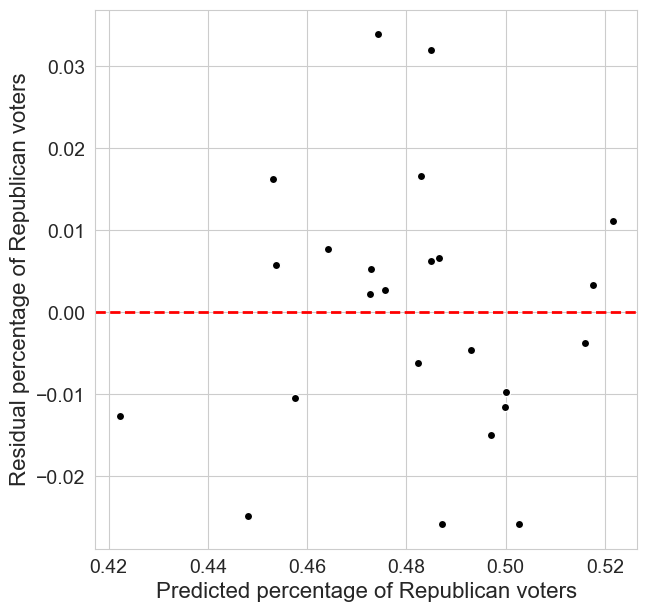

In [194]:
y_hat = model_rep_swing.predict()

plt.figure(figsize=(7, 7))

plt.plot(y_hat, model_rep_swing.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted percentage of Republican voters', fontsize=16)
plt.ylabel('Residual percentage of Republican voters', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

#### Our residual plot shows an inverse relationship with our Democrat data, which we would expect for our data.

### Reduced Model

### Democrat

#### For our Democrat reduced model, we will look into unemployment rate, 18-24 and 65+ population voting percentages.

In [195]:
model_dem_reduced_swing = smf.ols(
    formula='dem_votes_per ~ unemployment_rate + pop_18_24_per + pop_65_per',
    data=df_swing).fit()

print(model_dem_reduced_swing.summary())

                            OLS Regression Results                            
Dep. Variable:          dem_votes_per   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     10.03
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           0.000180
Time:                        17:04:03   Log-Likelihood:                 51.771
No. Observations:                  28   AIC:                            -95.54
Df Residuals:                      24   BIC:                            -90.21
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.3237      0.34

#### Our r-squared value is reduced here, probably because of the removal of some population percentages, which while not statistically significant in the full model, still seem to be playing a role in predicting the model. We've reduced the issues of multicollinearity by removing two of the population percentages, and found that all the predictors are now statistically significant.

#### The next step is setting up the residual plot.

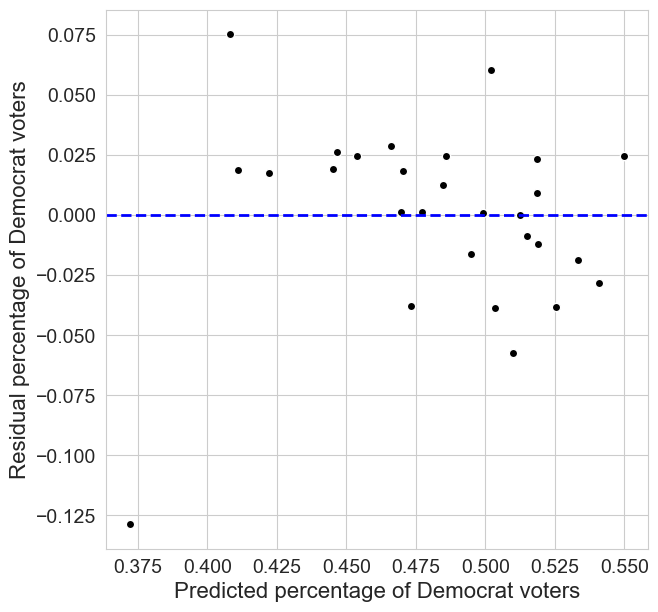

In [196]:
y_hat = model_dem_reduced_swing.predict()

plt.figure(figsize=(7, 7))

plt.plot(y_hat, model_dem_reduced_swing.resid, 'ko', mec='w')
plt.axhline(0, color='b', linestyle='dashed', lw=2)

plt.xlabel('Predicted percentage of Democrat voters', fontsize=16)
plt.ylabel('Residual percentage of Democrat voters', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

#### This residual plot does not have a structure, and we have used our input variables to the best of our abilities.

In [197]:
mean_absolute_error(df_swing.loc[model_dem_swing.fittedvalues.index, 'dem_votes_per'], model_dem_reduced_swing.predict(df.loc[model_dem_swing.fittedvalues.index]))

0.02212596162868921

In [198]:
mae_full = mean_absolute_error(df_swing.loc[model_dem_swing.fittedvalues.index, 'dem_votes_per'], model_dem_swing.fittedvalues)
mae_reduced = mean_absolute_error(df_swing.loc[model_dem_reduced_swing.fittedvalues.index, 'dem_votes_per'], model_dem_reduced_swing.fittedvalues)

r2_full = model_dem_swing.rsquared
r2_reduced = model_dem_reduced_swing.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_full, mae_reduced],
              'R-squared': [r2_full, r2_reduced]},
             index=['full model', 'reduced model']).round(4)

Mean Absolute Error  R-squared
full model                  0.0147     0.6556
reduced model               0.0275     0.5564

In [199]:
anova_lm(model_dem_reduced_swing, model_dem_swing)

df_resid       ssr  df_diff  ss_diff         F    Pr(>F)
0      24.0  0.040616      0.0      NaN       NaN       NaN
1      13.0  0.008516     11.0   0.0321  4.454571  0.006478

#### Our r-squared value is lower, and our mean absolute error doubles. While the predictors are statistically significant, the dataset is so small that it is quite inaccurate. 

### Republican

#### For our Republican reduced model, we will look into unemployment rate, 18-24 and 65+ population percentages.

In [213]:
model_rep_reduced_swing = smf.ols(
    formula='rep_votes_per ~ unemployment_rate + pop_18_24_per + pop_65_per',
    data=df_swing).fit()

print(model_rep_reduced_swing.summary())

                            OLS Regression Results                            
Dep. Variable:          rep_votes_per   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     2.504
Date:                Thu, 11 Dec 2025   Prob (F-statistic):             0.0833
Time:                        17:08:12   Log-Likelihood:                 45.312
No. Observations:                  28   AIC:                            -82.62
Df Residuals:                      24   BIC:                            -77.30
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.4726      0.42

#### Interestingly, the r-squared value drops sharply, and is a little more than a third of the r-squared value of the full model. In addition, the only predictor that is statistically significant now is the percentage of the population 18-24, which is interesting because both unemployment rate and percentage of the population 65+ that were statistically significant in the full model. This, combined with the low r-squared value makes it seem as though this model does not do a good job of predicting the percentage of Republican votes.

#### The next step is setting up the residual plot.

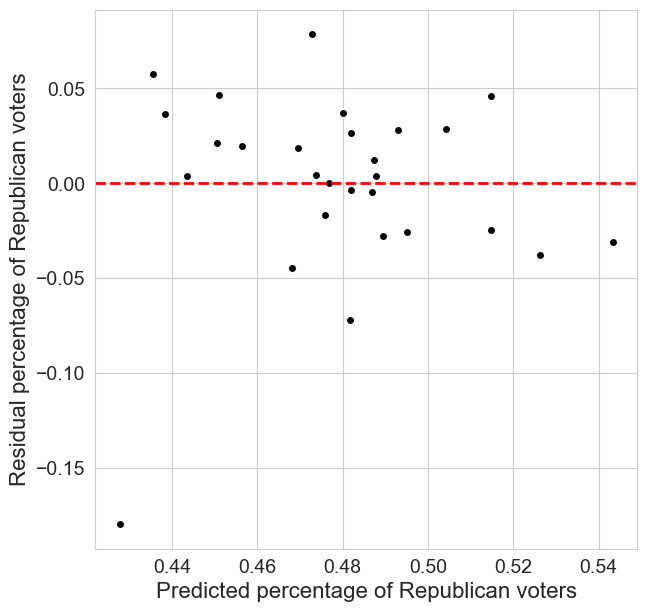

In [214]:
y_hat = model_rep_reduced_swing.predict()

plt.figure(figsize=(7, 7))

plt.plot(y_hat, model_rep_reduced_swing.resid, 'ko', mec='w')
plt.axhline(0, color='red', linestyle='dashed', lw=2)

plt.xlabel('Predicted percentage of Republican voters', fontsize=16)
plt.ylabel('Residual percentage of Republican voters', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

#### This residual plot might have a bit of a structure to it, in a somewhat parabolic arc that could indicate a non-linear model might be a better way to represent this data, and would also explain the drastic changes in both the r-squared values and the p-values for the coefficients and model.

In [215]:
mae_full = mean_absolute_error(df_swing.loc[model_rep_swing.fittedvalues.index, 'rep_votes_per'], model_rep_swing.fittedvalues)
mae_reduced = mean_absolute_error(df_swing.loc[model_rep_reduced_swing.fittedvalues.index, 'rep_votes_per'], model_rep_reduced_swing.fittedvalues)

r2_full = model_rep_swing.rsquared
r2_reduced = model_rep_reduced_swing.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_full, mae_reduced],
              'R-squared': [r2_full, r2_reduced]},
             index=['full model', 'reduced model']).round(4)

Mean Absolute Error  R-squared
full model                  0.0125     0.6913
reduced model               0.0335     0.2384

In [203]:
anova_lm(model_rep_reduced_swing, model_rep_swing)

df_resid       ssr  df_diff   ss_diff          F    Pr(>F)
0      24.0  0.064426      0.0       NaN        NaN       NaN
1      13.0  0.005811     11.0  0.058614  11.920052  0.000046

#### We can see that our r-squared value and mean absolute errors are much worse with our reduced model. This is probably due to the fact that the linear regression does not seem to be the best way to represent this model.

# Conclusion

#### Median income was the strongest factor that impacted voting percentage changes for both Democrat and Republican voting percentages in our data.
#### Our National random forest model was able to predict election results with an 83% accuracy based on the numercial predictors in our model.
#### Unemployment rate, median income, bachelor degree percentage, all population age ranges percentages (18-24, 25-44, 45-64, 65+), and voter participation all had statisitically significant results in our dataset.
#### Our multiple linear regression model produced an error rate between approximately +-5-7% from the true voting percentage total for each group on average. 
#### Our swing state models both showed that unemployment rate was statistically significant, with it being the only statistically significant predictor for the Democrat model, while the Republican model also included the population percentages.